In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta

In [2]:
data = pd.read_excel("J:/Innomatics/task4-AMCAT EDA/data.xlsx")
data.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [3]:
data.shape

(3998, 39)

In [4]:
# Check for missing values
print("Missing values count:")
print(data.isnull().sum())

Missing values count:
Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extrav

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
data['DOL'] = pd.to_datetime(data['DOL'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    2123 non-null   datetime64[ns]
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
data.describe().T

count           mean            std         min  \
ID                     3998.0  663794.540520  363218.245829  11244.0000   
Salary                 3998.0  307699.849925  212737.499957  35000.0000   
10percentage           3998.0      77.925443       9.850162     43.0000   
12graduation           3998.0    2008.087544       1.653599   1995.0000   
12percentage           3998.0      74.466366      10.999933     40.0000   
CollegeID              3998.0    5156.851426    4802.261482      2.0000   
CollegeTier            3998.0       1.925713       0.262270      1.0000   
collegeGPA             3998.0      71.486171       8.167338      6.4500   
CollegeCityID          3998.0    5156.851426    4802.261482      2.0000   
CollegeCityTier        3998.0       0.300400       0.458489      0.0000   
GraduationYear         3998.0    2012.105803      31.857271      0.0000   
English                3998.0     501.649075     104.940021    180.0000   
Logical                3998.0     501.598799      86.783297    195.0000   
Quant                  3998.0     513.378189     122.302332    120.0000   
Domain                 3998.0       0.510490       0.468671     -1.0000   
ComputerProgramming    3998.0     353.102801     205.355519     -1.0000   
ElectronicsAndSemicon  3998.0      95.328414     158.241218     -1.0000   
ComputerScience        3998.0      90.742371     175.273083     -1.0000   
MechanicalEngg         3998.0      22.974737      98.123311     -1.0000   
ElectricalEngg         3998.0      16.478739      87.585634     -1.0000   
TelecomEngg            3998.0      31.851176     104.852845     -1.0000   
CivilEngg              3998.0       2.683842      36.658505     -1.0000   
conscientiousness      3998.0      -0.037831       1.028666     -4.1267   
agreeableness          3998.0       0.146496       0.941782     -5.7816   
extraversion           3998.0       0.002763       0.951471     -4.6009   
nueroticism            3998.0      -0.169033       1.007580     -2.6430   
openess_to_experience  3998.0      -0.138110       1.008075     -7.3757   

                                 25%            50%            75%  \
ID                     334284.250000  639600.000000  990480.000000   
Salary                 180000.000000  300000.000000  370000.000000   
10percentage               71.680000      79.150000      85.670000   
12graduation             2007.000000    2008.000000    2009.000000   
12percentage               66.000000      74.400000      82.600000   
CollegeID                 494.000000    3879.000000    8818.000000   
CollegeTier                 2.000000       2.000000       2.000000   
collegeGPA                 66.407500      71.720000      76.327500   
CollegeCityID             494.000000    3879.000000    8818.000000   
CollegeCityTier             0.000000       0.000000       1.000000   
GraduationYear           2012.000000    2013.000000    2014.000000   
English                   425.000000     500.000000     570.000000   
Logical                   445.000000     505.000000     565.000000   
Quant                     430.000000     515.000000     595.000000   
Domain                      0.342315       0.622643       0.842248   
ComputerProgramming       295.000000     415.000000     495.000000   
ElectronicsAndSemicon      -1.000000      -1.000000     233.000000   
ComputerScience            -1.000000      -1.000000      -1.000000   
MechanicalEngg             -1.000000      -1.000000      -1.000000   
ElectricalEngg             -1.000000      -1.000000      -1.000000   
TelecomEngg                -1.000000      -1.000000      -1.000000   
CivilEngg                  -1.000000      -1.000000      -1.000000   
conscientiousness          -0.713525       0.046400       0.702700   
agreeableness              -0.287100       0.212400       0.812800   
extraversion               -0.604800       0.091400       0.672000   
nueroticism                -0.868200      -0.234400       0.526200   
openess_to_experience      -0.669

In [8]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [9]:
# Removing the 'Unnamed: 0' column
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

ID   Salary        DOJ        DOL               Designation    JobCity  \
0  203097   420000 2012-06-01        NaT   senior quality engineer  Bangalore   
1  579905   500000 2013-09-01        NaT         assistant manager     Indore   
2  810601   325000 2014-06-01        NaT          systems engineer    Chennai   
3  267447  1100000 2011-07-01        NaT  senior software engineer    Gurgaon   
4  343523   200000 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  ...  \
0      f 1990-02-19          84.3  board ofsecondary education,ap  ...   
1      m 1989-10-04          85.4                            cbse  ...   
2      f 1992-08-03          85.0                            cbse  ...   
3      m 1989-12-05          85.6                            cbse  ...   
4      m 1991-02-27          78.0                            cbse  ...   

   ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1             -1           -1         -1   
1               -1              -1             -1           -1         -1   
2               -1              -1             -1           -1         -1   
3               -1              -1             -1           -1         -1   
4               -1              -1             -1           -1         -1   

  conscientiousness agreeableness  extraversion  nueroticism  \
0            0.9737        0.8128        0.5269      1.35490   
1           -0.7335        0.3789        1.2396     -0.10760   
2            0.2718        1.7109        0.1637     -0.86820   
3            0.0464        0.3448       -0.3440     -0.40780   
4           -0.8810       -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 38 columns]

Treat 'NaT' as 'present'

In [10]:
# Count the number of unique values in each column
count = {}

for col in data.columns:
    count[col] = data[col].nunique()

for idx, element in count.items():
  print(f"{idx}: {element}")
     

ID: 3998
Salary: 177
DOJ: 81
DOL: 66
Designation: 419
JobCity: 339
Gender: 2
DOB: 1872
10percentage: 851
10board: 275
12graduation: 16
12percentage: 801
12board: 340
CollegeID: 1350
CollegeTier: 2
Degree: 4
Specialization: 46
collegeGPA: 1282
CollegeCityID: 1350
CollegeCityTier: 2
CollegeState: 26
GraduationYear: 11
English: 111
Logical: 107
Quant: 138
Domain: 243
ComputerProgramming: 79
ElectronicsAndSemicon: 29
ComputerScience: 20
MechanicalEngg: 42
ElectricalEngg: 31
TelecomEngg: 26
CivilEngg: 23
conscientiousness: 141
agreeableness: 149
extraversion: 154
nueroticism: 217
openess_to_experience: 142



Univariate Analysis


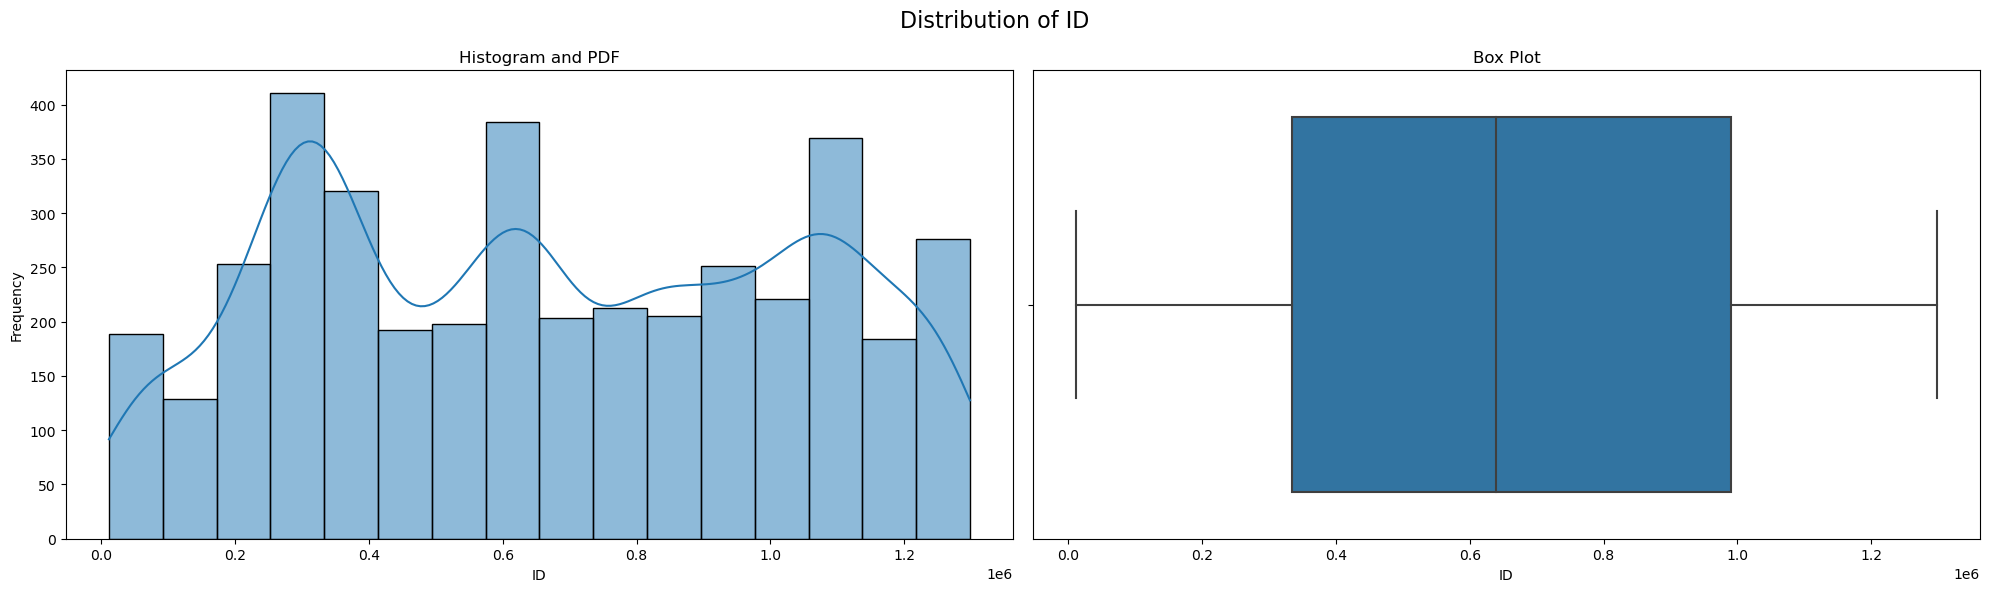

Observations for ID:
- The distribution appears to be symmetric.
- The mean value is 663794.54 and the median is 639600.00.
- The data ranges from 11244.00 to 1298275.00.
- Skewness: 0.05
- Kurtosis: -1.22
- The interquartile range (IQR) is 656195.75
- There are 0 outliers identified.




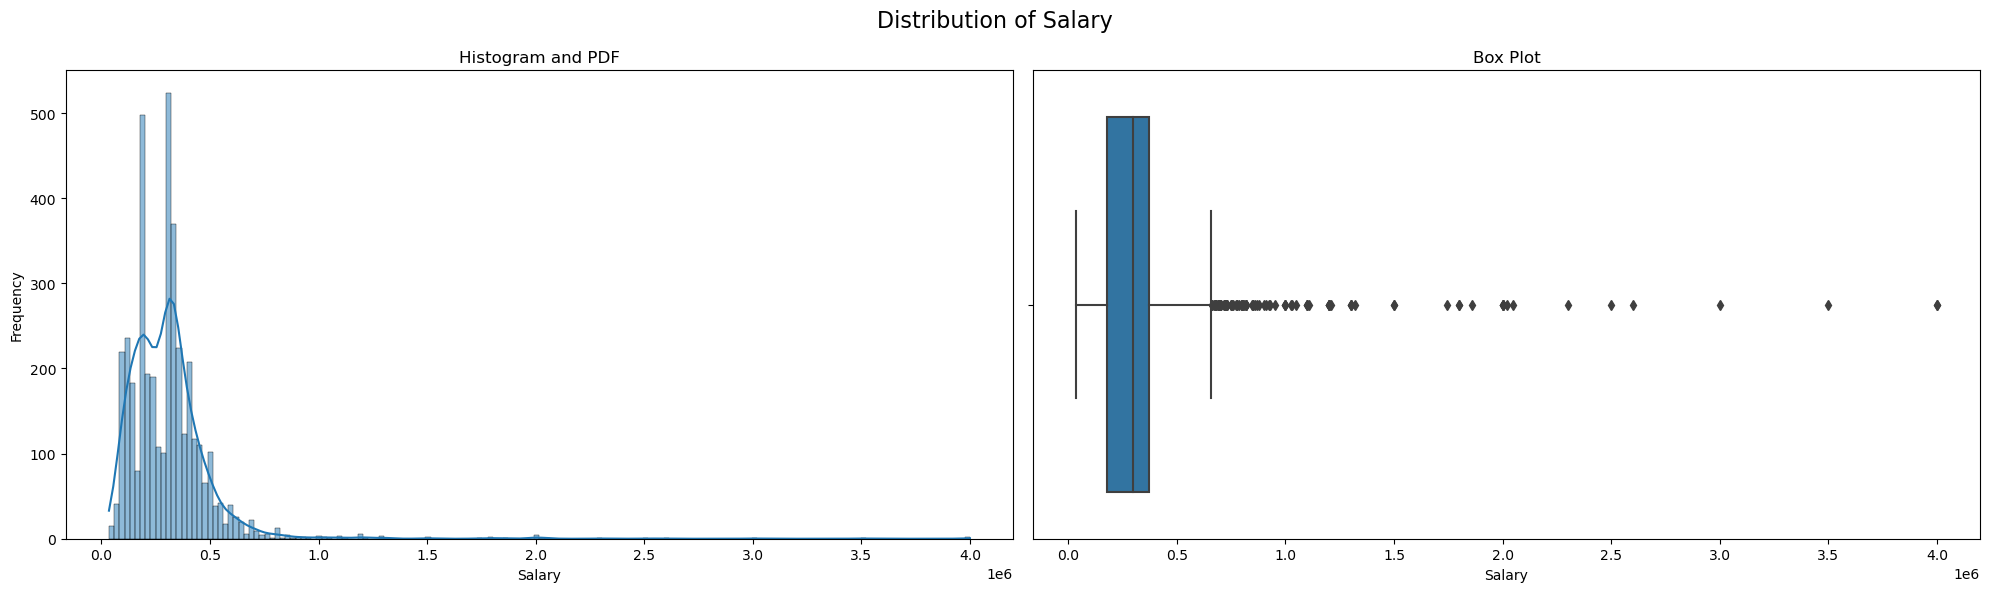

Observations for Salary:
- The distribution appears to be skewed.
- The mean value is 307699.85 and the median is 300000.00.
- The data ranges from 35000.00 to 4000000.00.
- Skewness: 6.45
- Kurtosis: 80.93
- The interquartile range (IQR) is 190000.00
- There are 109 outliers identified.




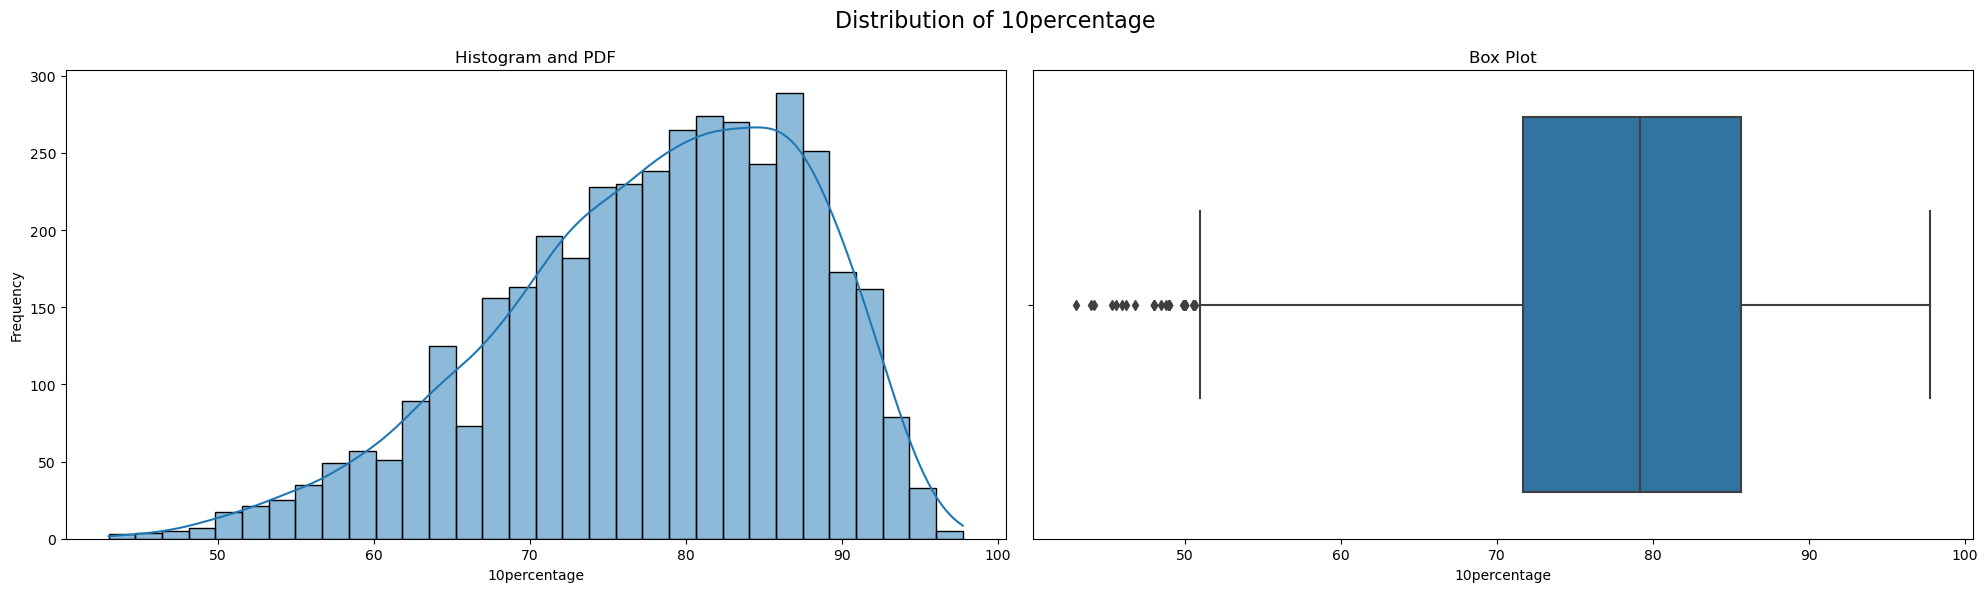

Observations for 10percentage:
- The distribution appears to be skewed.
- The mean value is 77.93 and the median is 79.15.
- The data ranges from 43.00 to 97.76.
- Skewness: -0.59
- Kurtosis: -0.11
- The interquartile range (IQR) is 13.99
- There are 30 outliers identified.




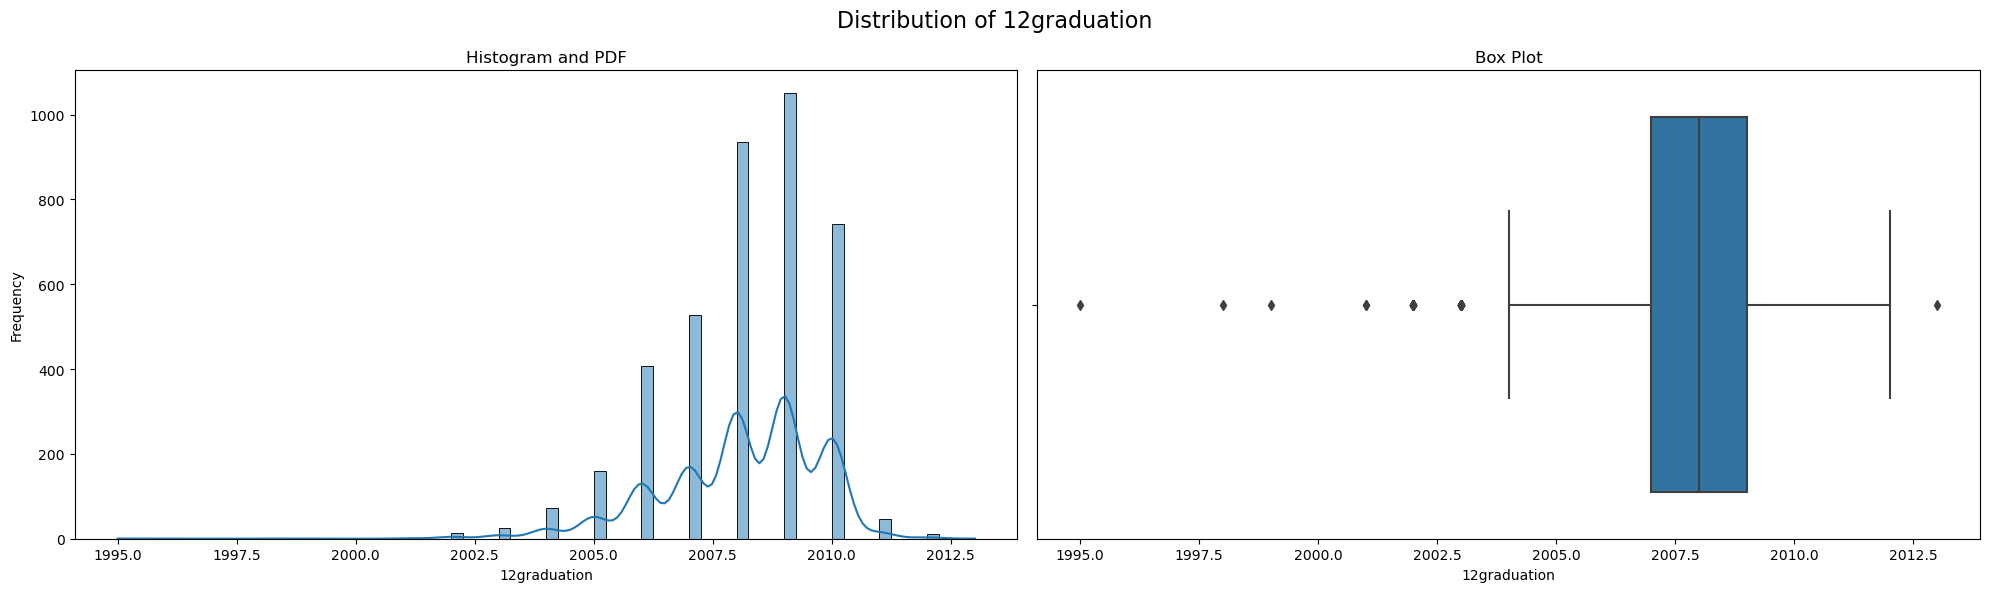

Observations for 12graduation:
- The distribution appears to be skewed.
- The mean value is 2008.09 and the median is 2008.00.
- The data ranges from 1995.00 to 2013.00.
- Skewness: -0.96
- Kurtosis: 1.95
- The interquartile range (IQR) is 2.00
- There are 45 outliers identified.




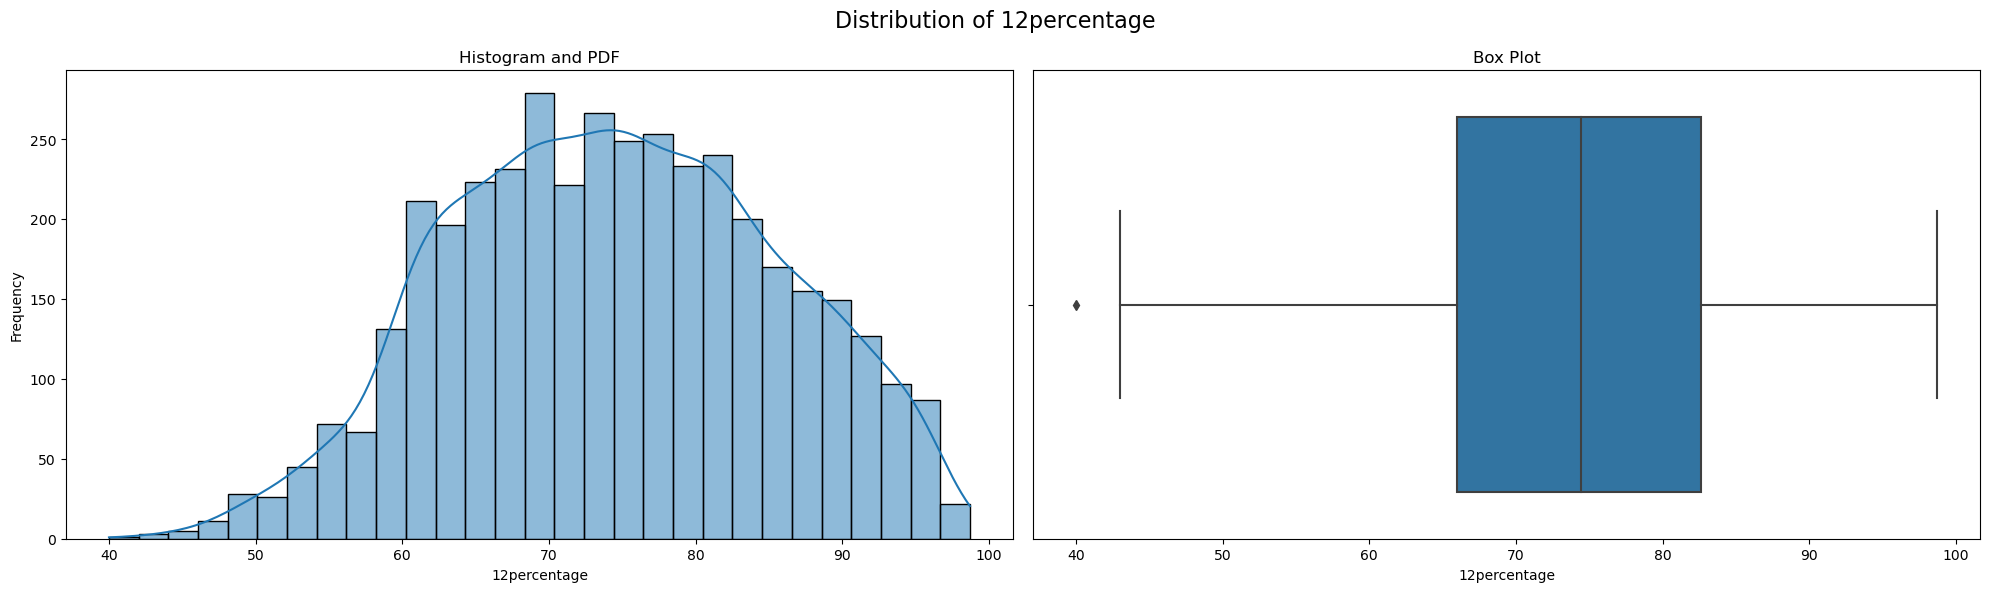

Observations for 12percentage:
- The distribution appears to be symmetric.
- The mean value is 74.47 and the median is 74.40.
- The data ranges from 40.00 to 98.70.
- Skewness: -0.03
- Kurtosis: -0.63
- The interquartile range (IQR) is 16.60
- There are 1 outliers identified.




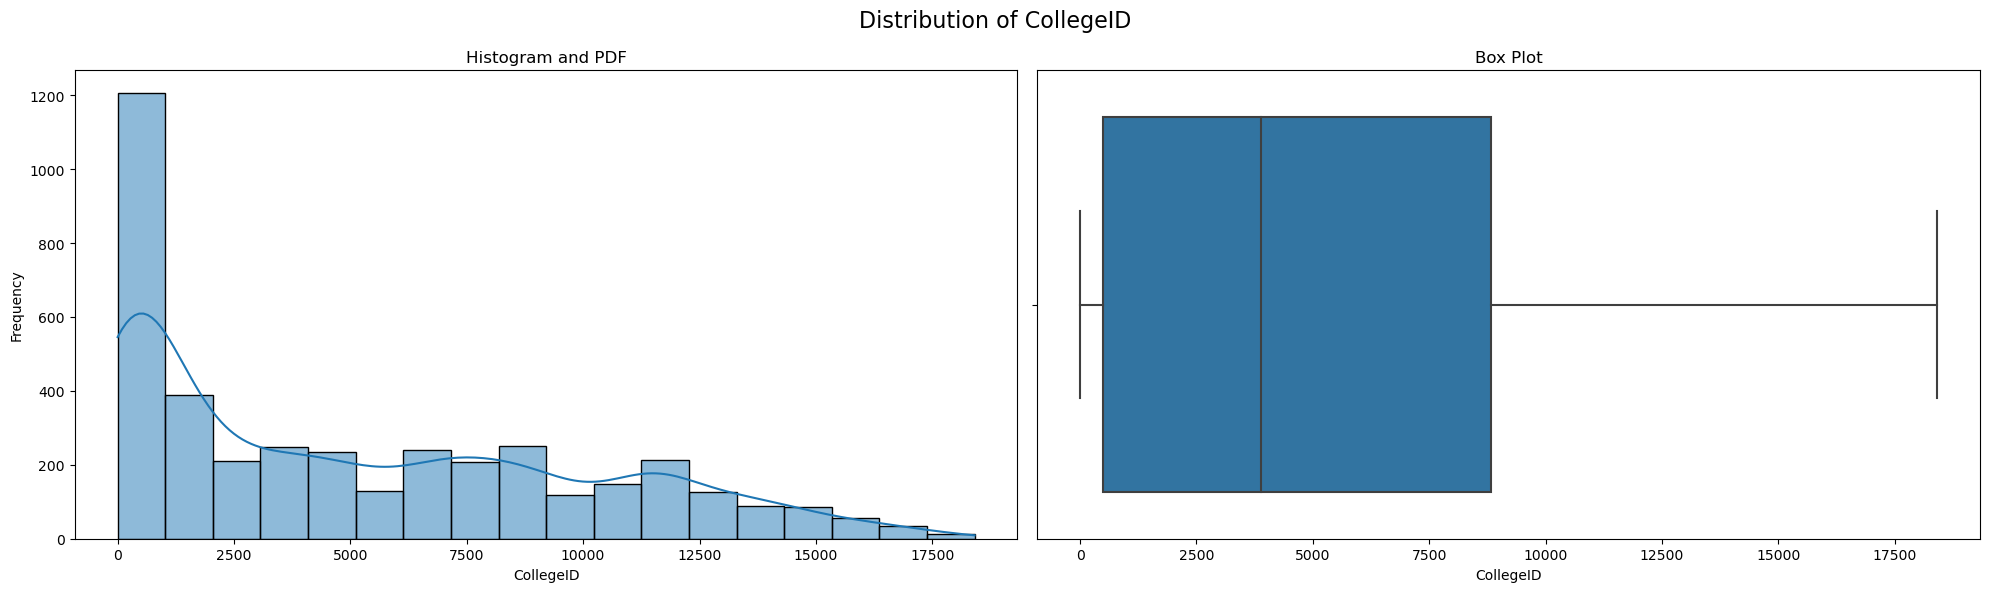

Observations for CollegeID:
- The distribution appears to be skewed.
- The mean value is 5156.85 and the median is 3879.00.
- The data ranges from 2.00 to 18409.00.
- Skewness: 0.65
- Kurtosis: -0.77
- The interquartile range (IQR) is 8324.00
- There are 0 outliers identified.




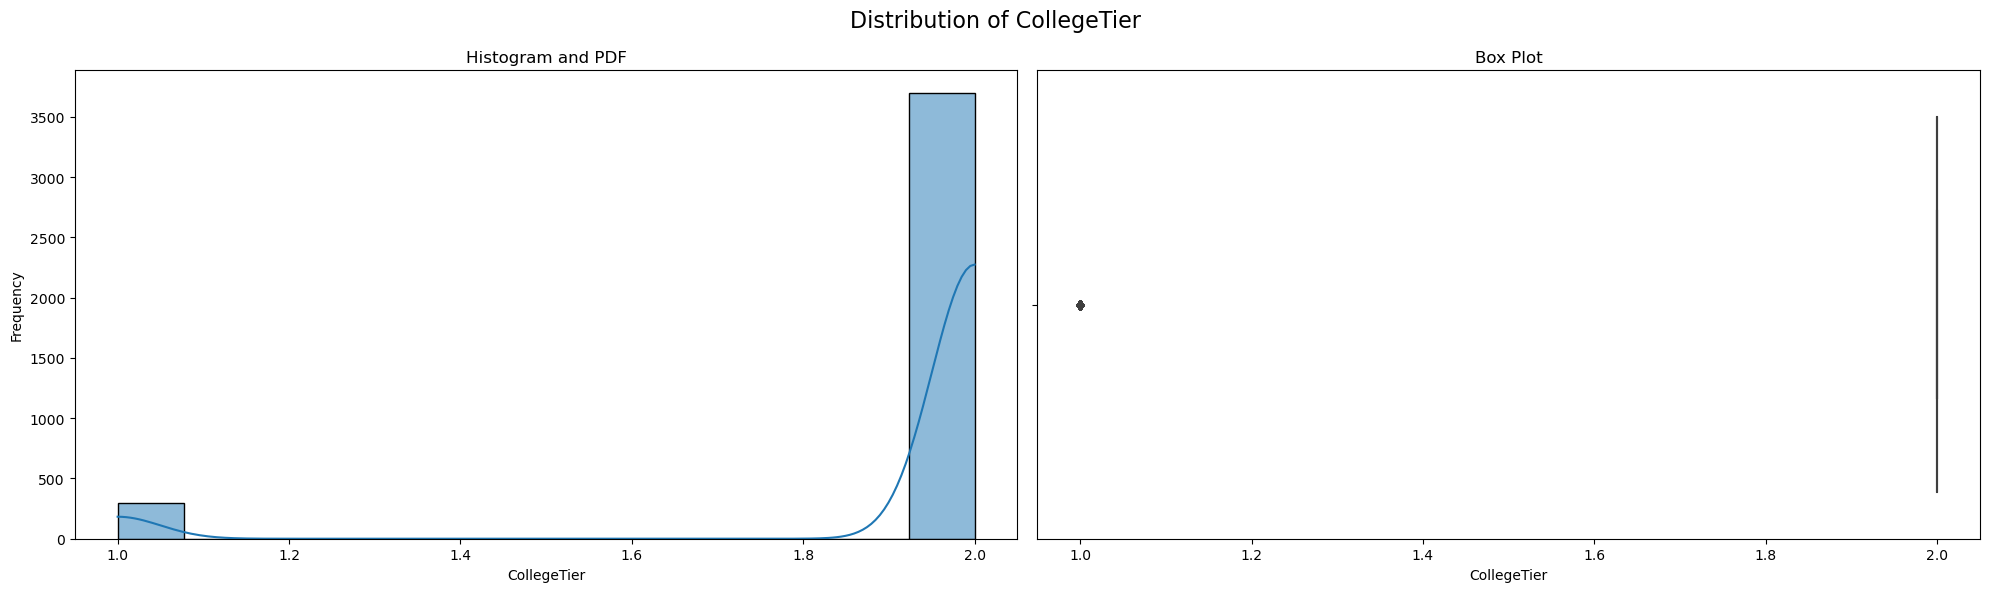

Observations for CollegeTier:
- The distribution appears to be skewed.
- The mean value is 1.93 and the median is 2.00.
- The data ranges from 1.00 to 2.00.
- Skewness: -3.25
- Kurtosis: 8.55
- The interquartile range (IQR) is 0.00
- There are 297 outliers identified.




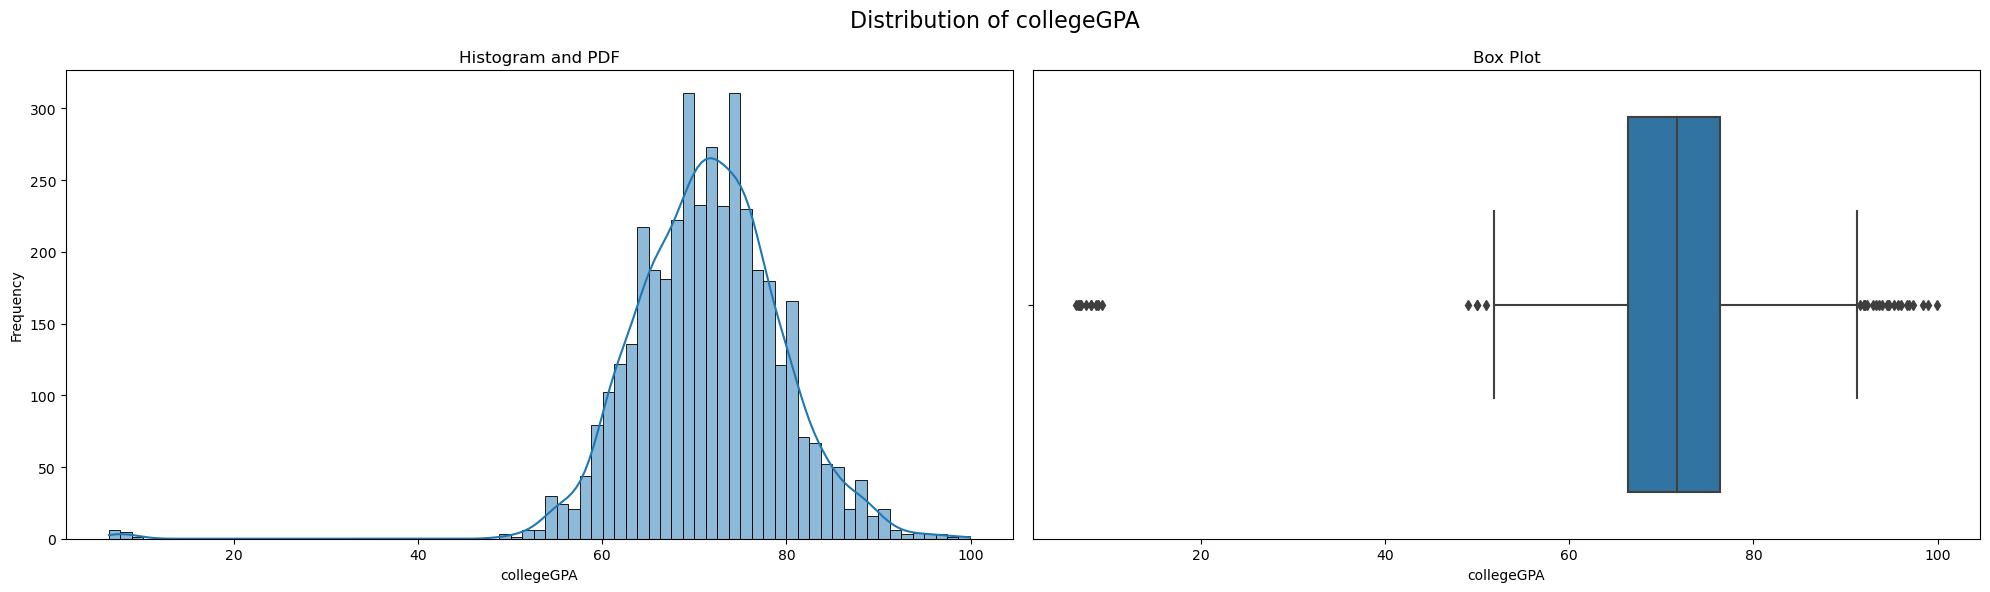

Observations for collegeGPA:
- The distribution appears to be skewed.
- The mean value is 71.49 and the median is 71.72.
- The data ranges from 6.45 to 99.93.
- Skewness: -1.25
- Kurtosis: 10.23
- The interquartile range (IQR) is 9.92
- There are 38 outliers identified.




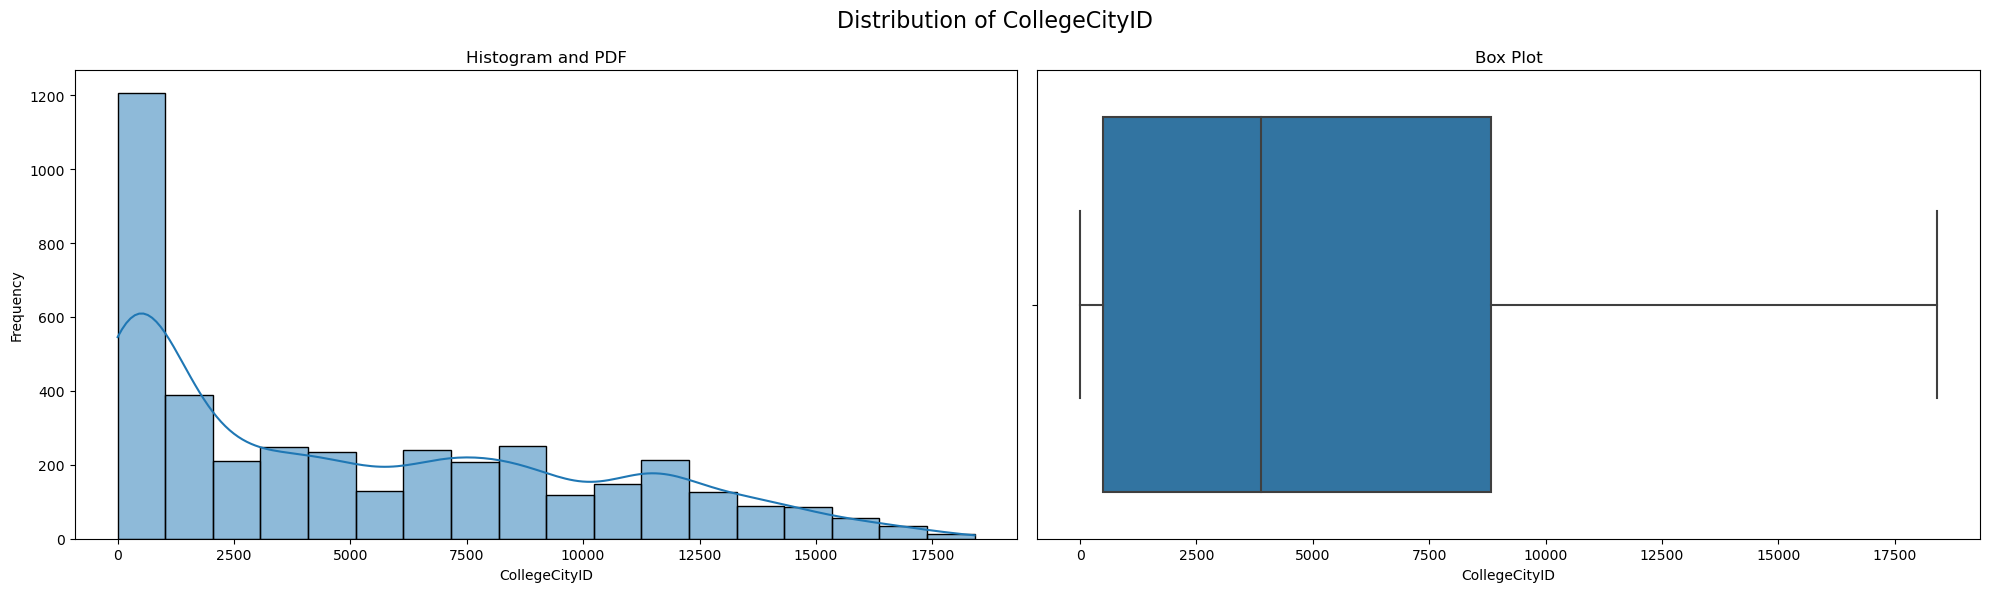

Observations for CollegeCityID:
- The distribution appears to be skewed.
- The mean value is 5156.85 and the median is 3879.00.
- The data ranges from 2.00 to 18409.00.
- Skewness: 0.65
- Kurtosis: -0.77
- The interquartile range (IQR) is 8324.00
- There are 0 outliers identified.




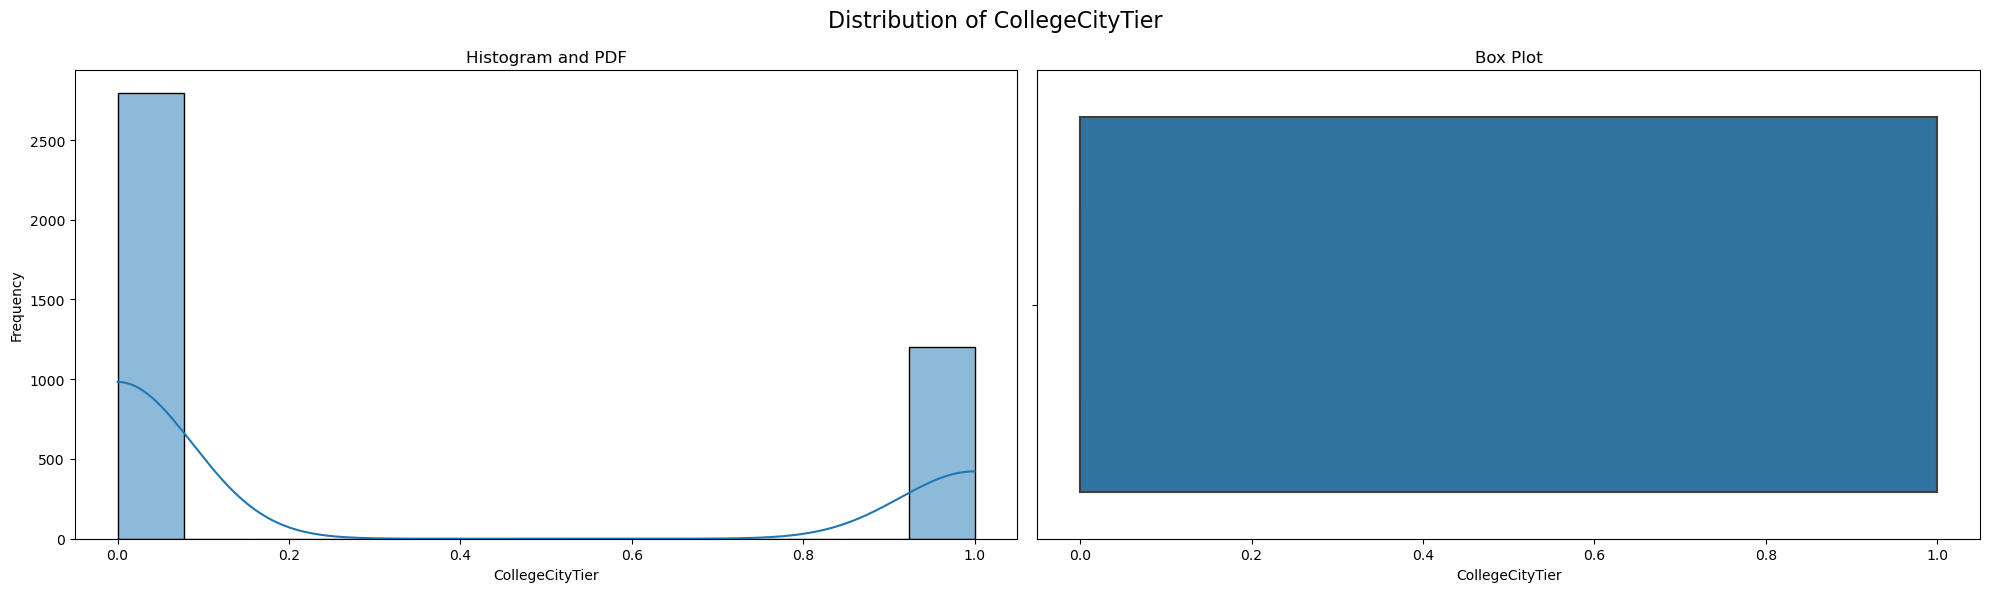

Observations for CollegeCityTier:
- The distribution appears to be skewed.
- The mean value is 0.30 and the median is 0.00.
- The data ranges from 0.00 to 1.00.
- Skewness: 0.87
- Kurtosis: -1.24
- The interquartile range (IQR) is 1.00
- There are 0 outliers identified.




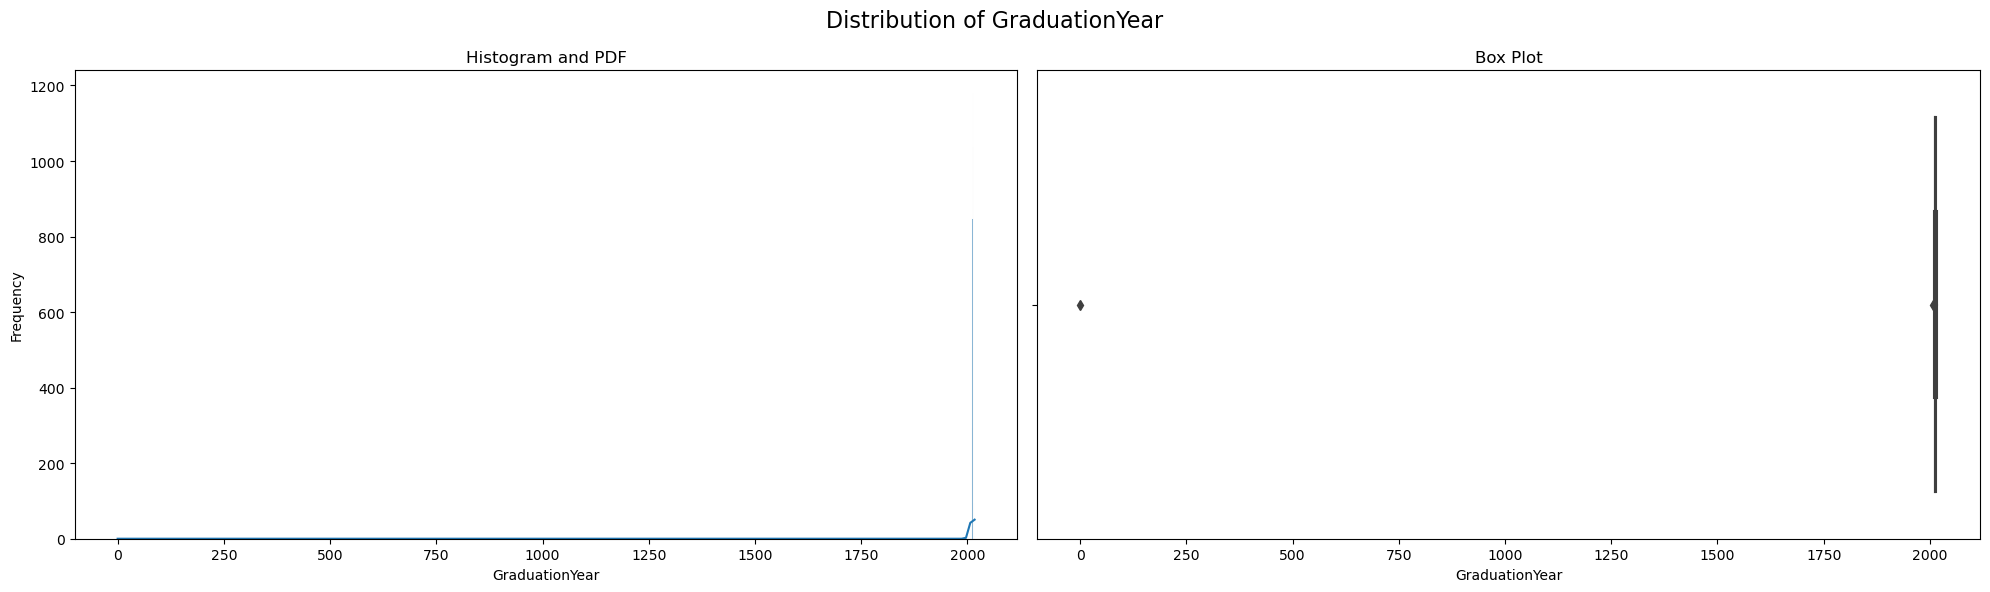

Observations for GraduationYear:
- The distribution appears to be skewed.
- The mean value is 2012.11 and the median is 2013.00.
- The data ranges from 0.00 to 2017.00.
- Skewness: -63.07
- Kurtosis: 3984.37
- The interquartile range (IQR) is 2.00
- There are 2 outliers identified.




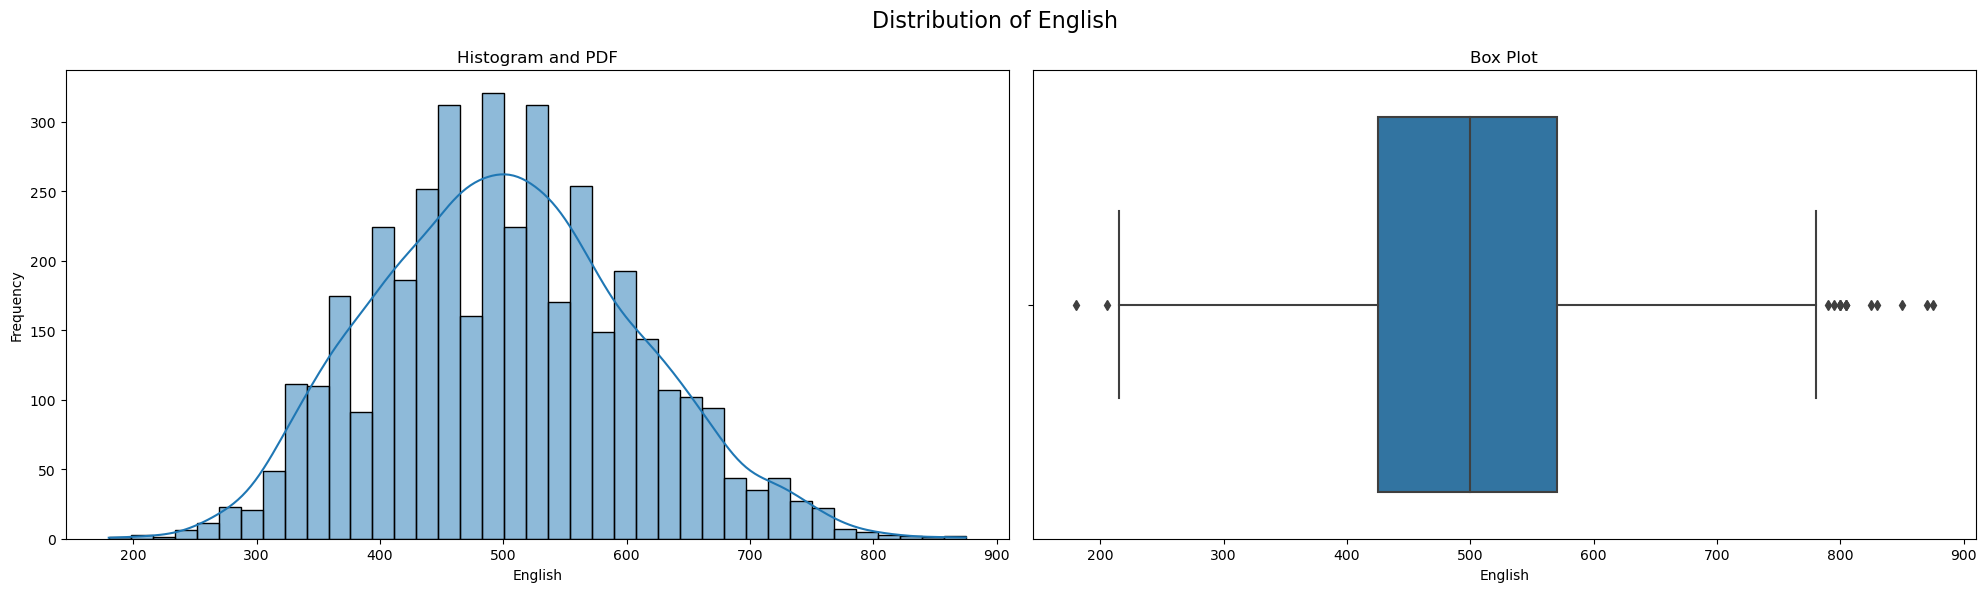

Observations for English:
- The distribution appears to be symmetric.
- The mean value is 501.65 and the median is 500.00.
- The data ranges from 180.00 to 875.00.
- Skewness: 0.19
- Kurtosis: -0.25
- The interquartile range (IQR) is 145.00
- There are 15 outliers identified.




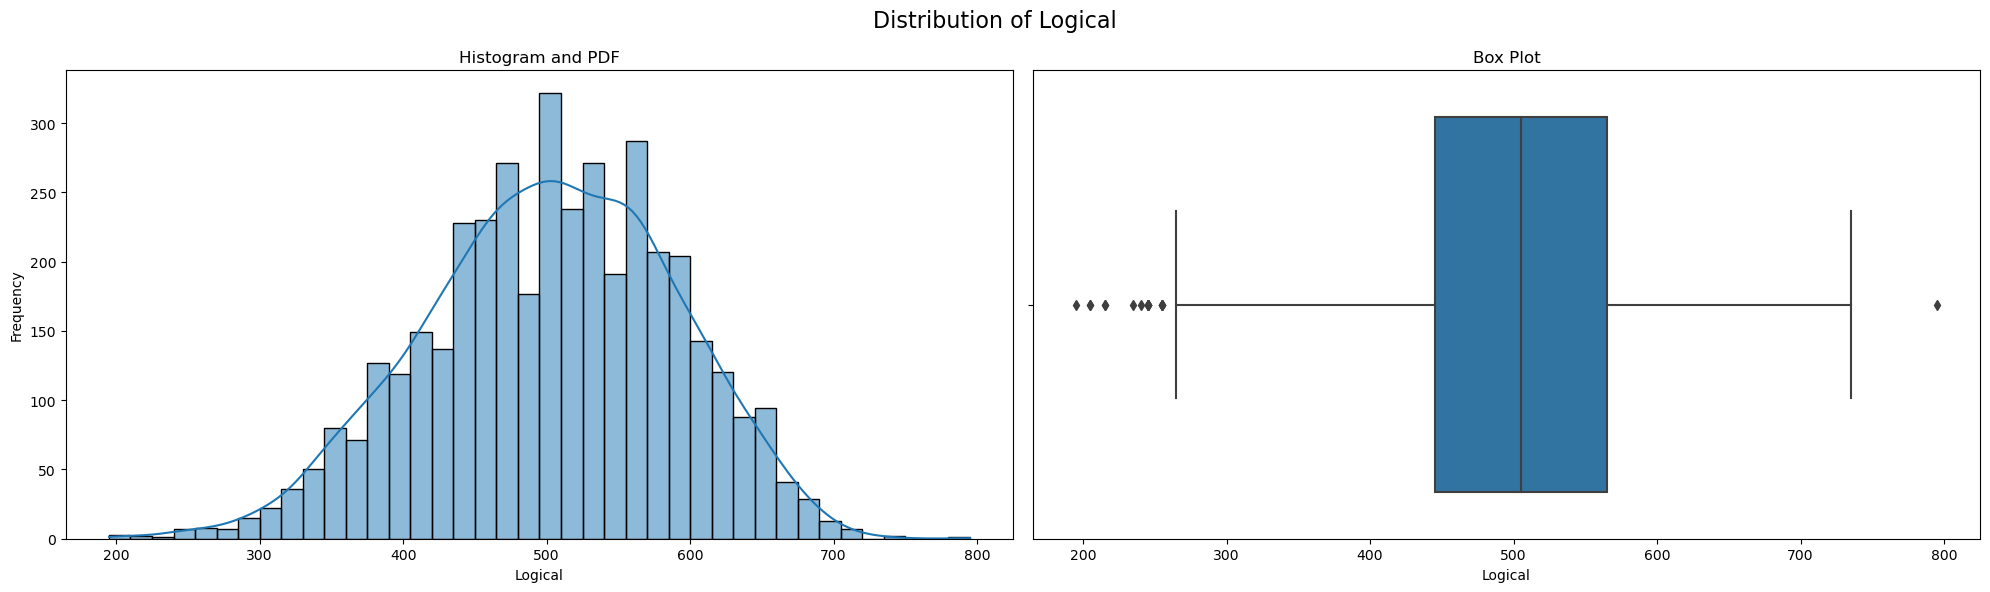

Observations for Logical:
- The distribution appears to be symmetric.
- The mean value is 501.60 and the median is 505.00.
- The data ranges from 195.00 to 795.00.
- Skewness: -0.22
- Kurtosis: -0.22
- The interquartile range (IQR) is 120.00
- There are 18 outliers identified.




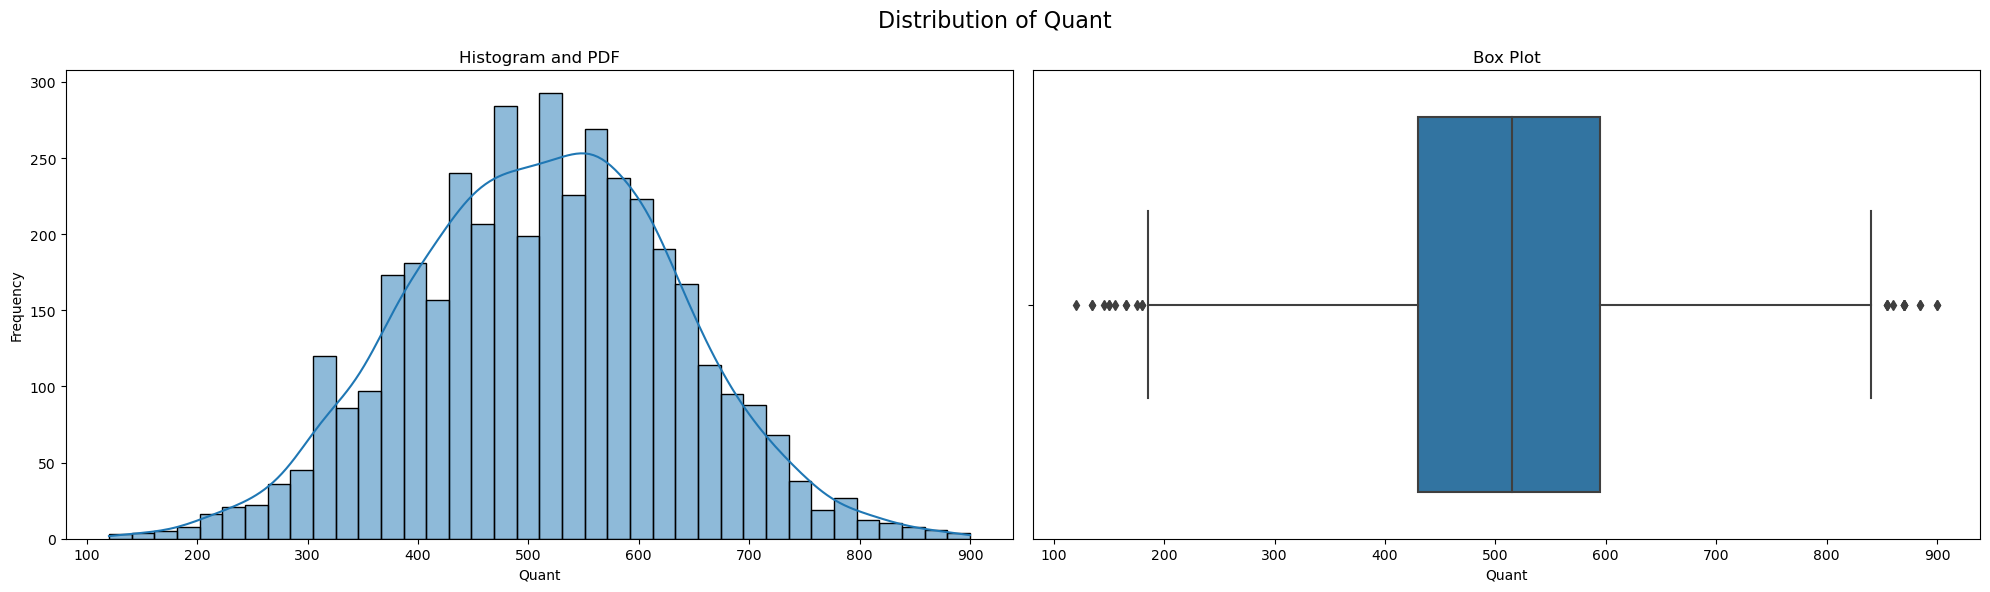

Observations for Quant:
- The distribution appears to be symmetric.
- The mean value is 513.38 and the median is 515.00.
- The data ranges from 120.00 to 900.00.
- Skewness: -0.02
- Kurtosis: -0.10
- The interquartile range (IQR) is 165.00
- There are 25 outliers identified.




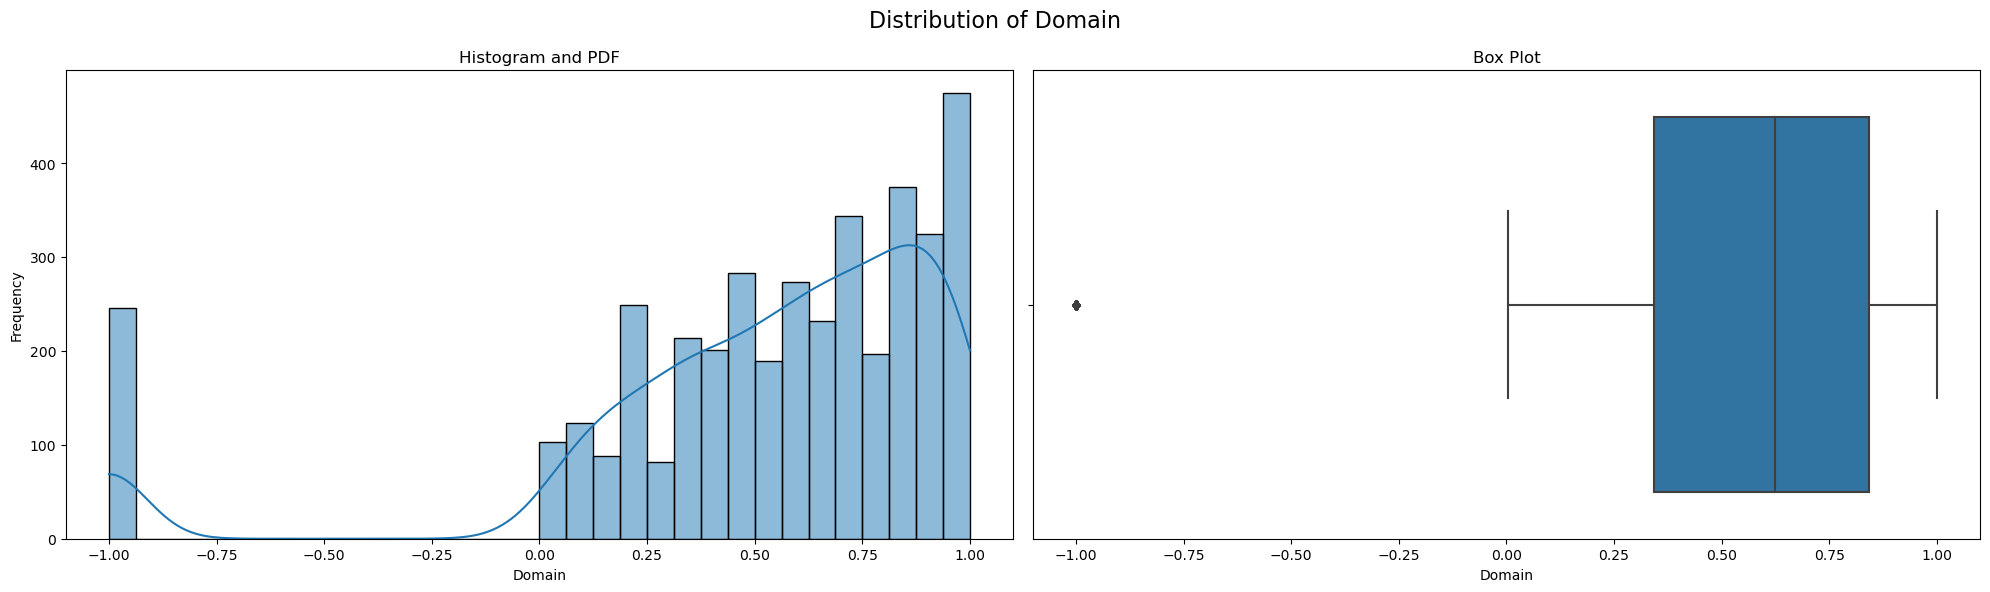

Observations for Domain:
- The distribution appears to be skewed.
- The mean value is 0.51 and the median is 0.62.
- The data ranges from -1.00 to 1.00.
- Skewness: -1.92
- Kurtosis: 3.90
- The interquartile range (IQR) is 0.50
- There are 246 outliers identified.




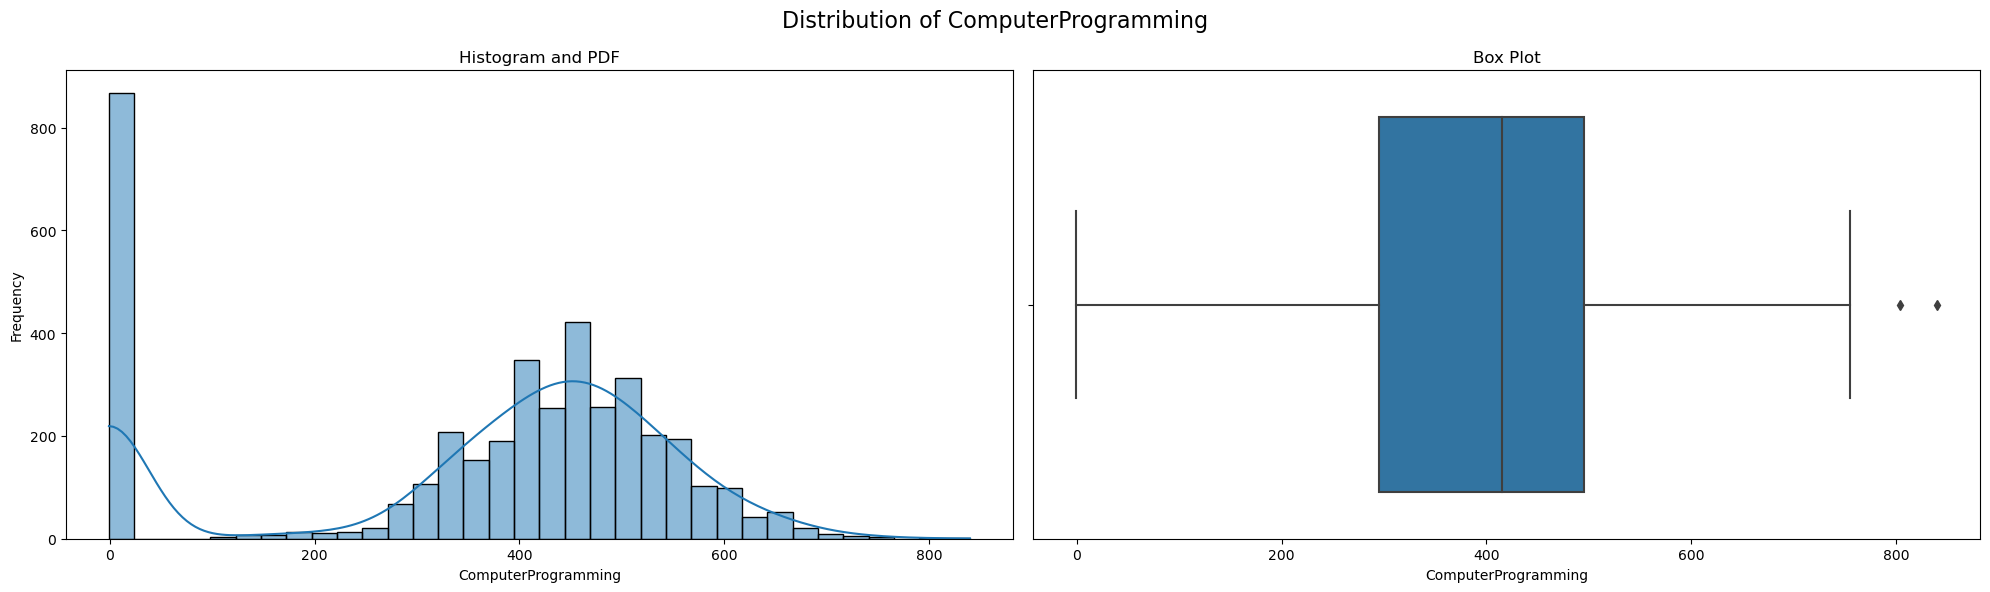

Observations for ComputerProgramming:
- The distribution appears to be skewed.
- The mean value is 353.10 and the median is 415.00.
- The data ranges from -1.00 to 840.00.
- Skewness: -0.78
- Kurtosis: -0.67
- The interquartile range (IQR) is 200.00
- There are 2 outliers identified.




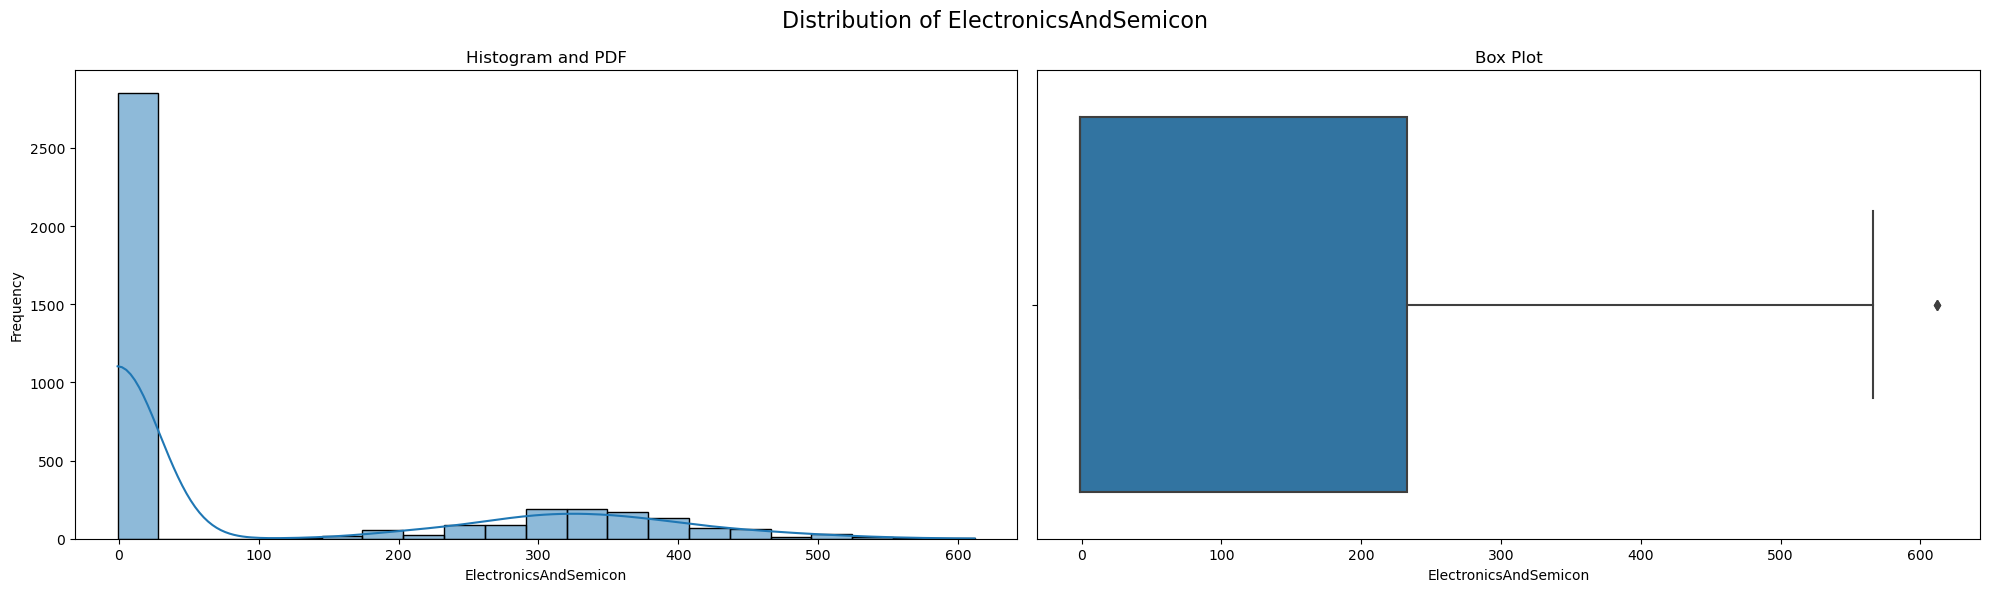

Observations for ElectronicsAndSemicon:
- The distribution appears to be skewed.
- The mean value is 95.33 and the median is -1.00.
- The data ranges from -1.00 to 612.00.
- Skewness: 1.20
- Kurtosis: -0.21
- The interquartile range (IQR) is 234.00
- There are 2 outliers identified.




Observations for ComputerScience:
- The distribution appears to be skewed.
- The mean value is 90.74 and the median is -1.00.
- The data ranges from -1.00 to 715.00.
- Skewness: 1.53
- Kurtosis: 0.69
- The interquartile range (IQR) is 0.00
- There are 902 outliers identified.




Observations for MechanicalEngg:
- The distribution appears to be skewed.
- The mean value is 22.97 and the median is -1.00.
- The data ranges from -1.00 to 623.00.
- Skewness: 4.03
- Kurtosis: 15.02
- The interquartile range (IQR) is 0.00
- There are 235 outliers identified.




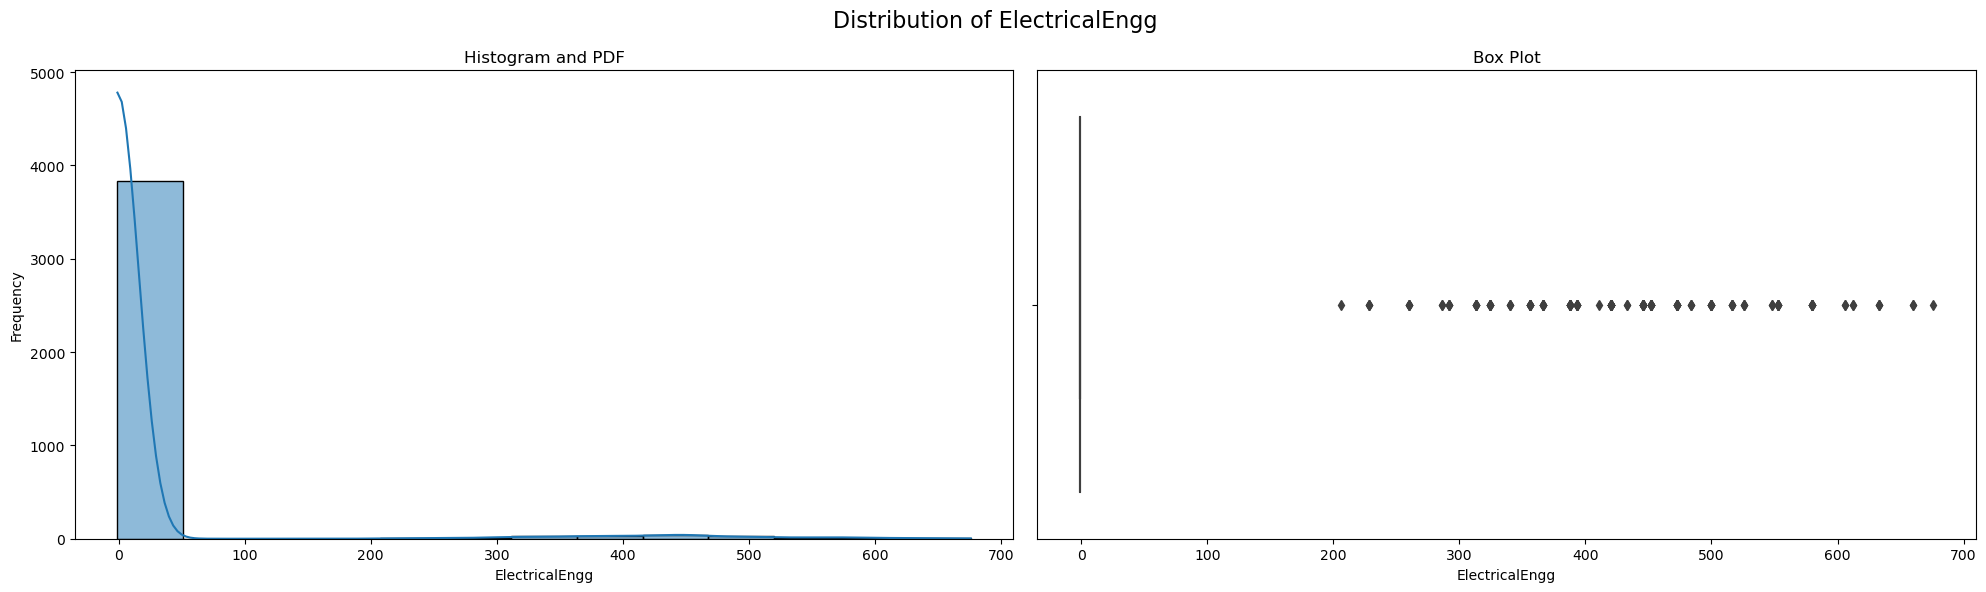

Observations for ElectricalEngg:
- The distribution appears to be skewed.
- The mean value is 16.48 and the median is -1.00.
- The data ranges from -1.00 to 676.00.
- Skewness: 5.06
- Kurtosis: 24.88
- The interquartile range (IQR) is 0.00
- There are 161 outliers identified.




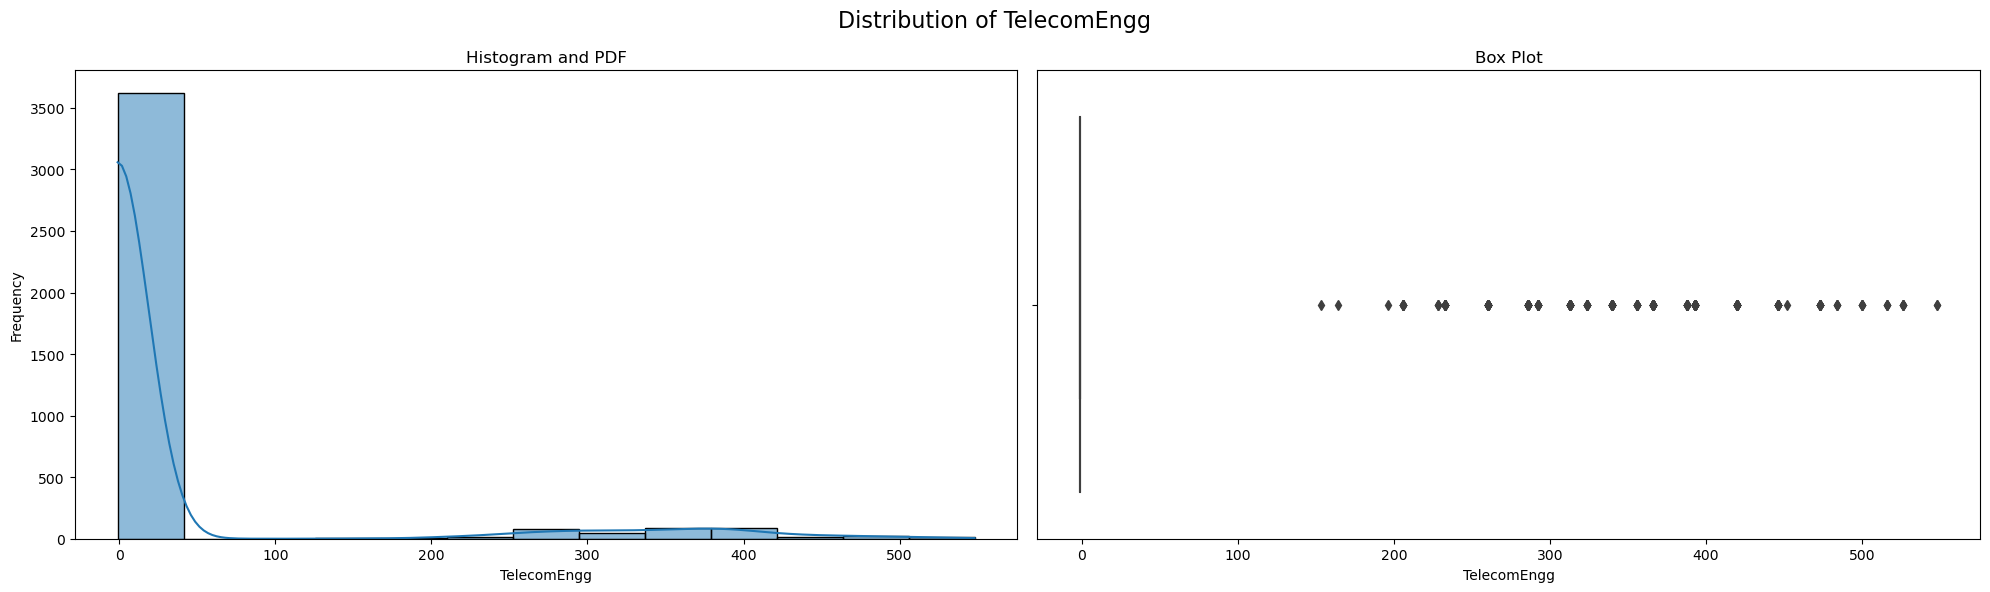

Observations for TelecomEngg:
- The distribution appears to be skewed.
- The mean value is 31.85 and the median is -1.00.
- The data ranges from -1.00 to 548.00.
- Skewness: 3.04
- Kurtosis: 7.81
- The interquartile range (IQR) is 0.00
- There are 374 outliers identified.




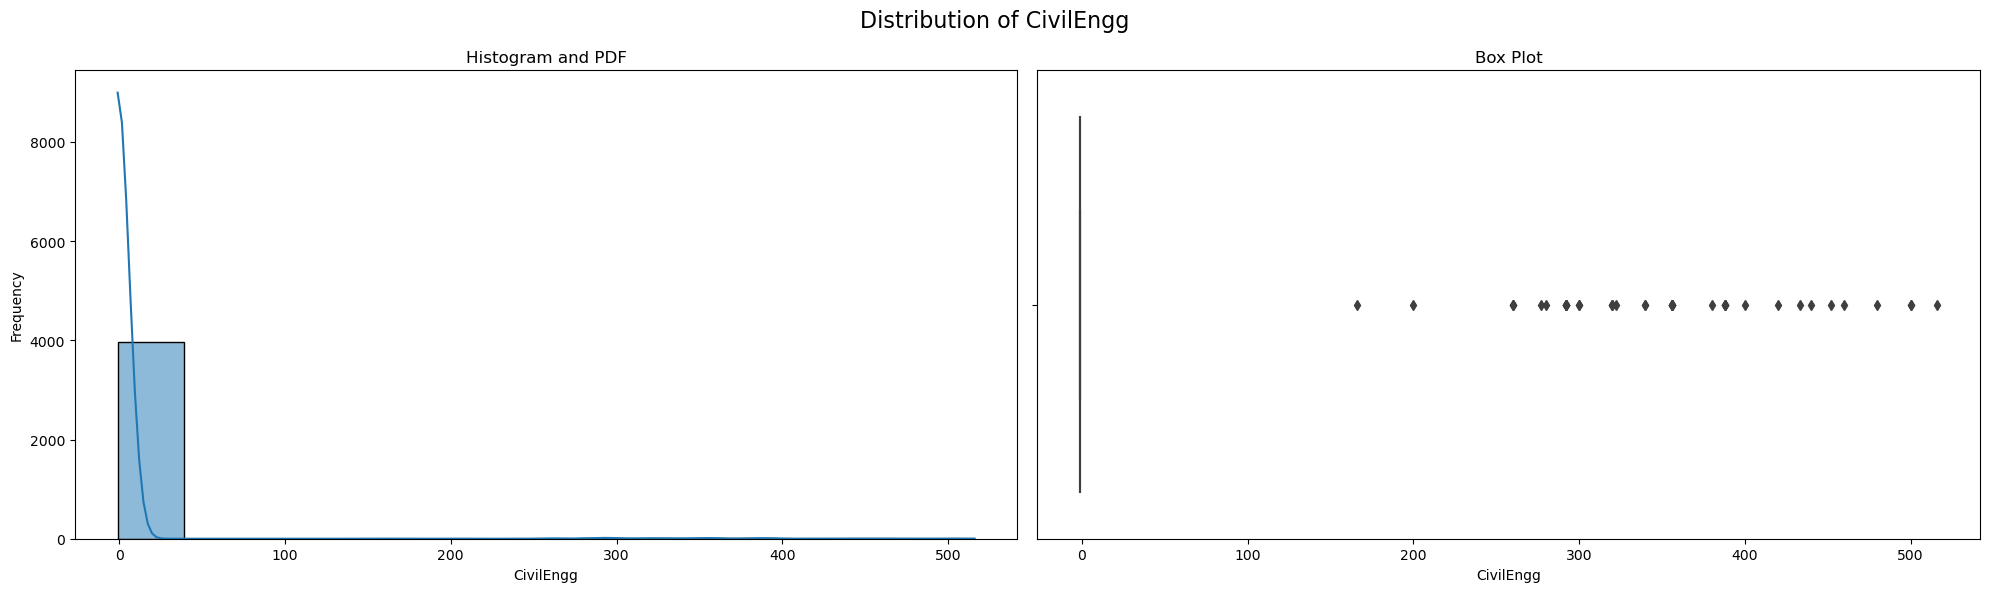

Observations for CivilEngg:
- The distribution appears to be skewed.
- The mean value is 2.68 and the median is -1.00.
- The data ranges from -1.00 to 516.00.
- Skewness: 10.32
- Kurtosis: 109.04
- The interquartile range (IQR) is 0.00
- There are 42 outliers identified.




Observations for conscientiousness:
- The distribution appears to be skewed.
- The mean value is -0.04 and the median is 0.05.
- The data ranges from -4.13 to 2.00.
- Skewness: -0.53
- Kurtosis: 0.12
- The interquartile range (IQR) is 1.42
- There are 39 outliers identified.




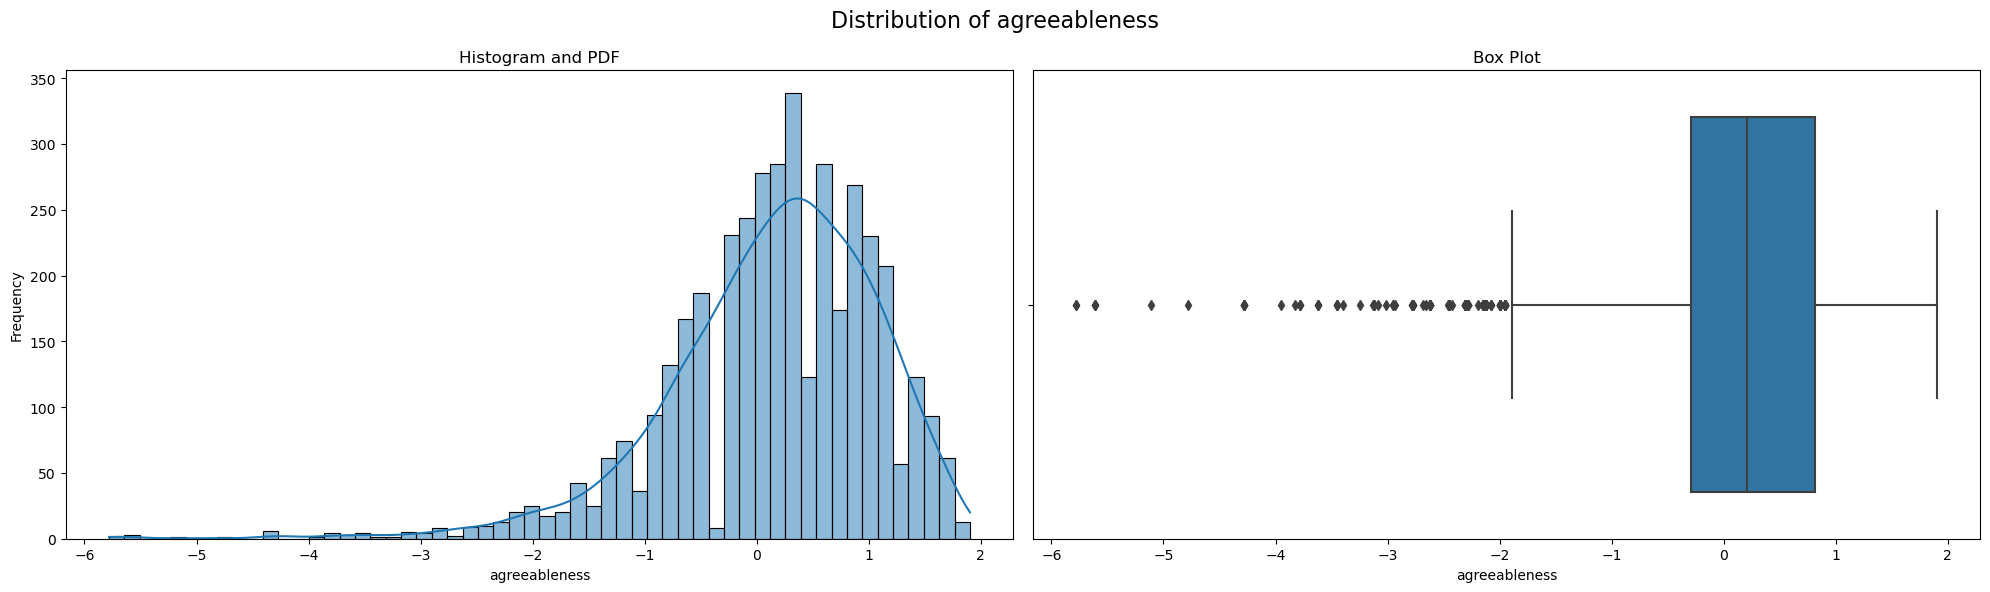

Observations for agreeableness:
- The distribution appears to be skewed.
- The mean value is 0.15 and the median is 0.21.
- The data ranges from -5.78 to 1.90.
- Skewness: -1.20
- Kurtosis: 3.39
- The interquartile range (IQR) is 1.10
- There are 123 outliers identified.




Observations for extraversion:
- The distribution appears to be skewed.
- The mean value is 0.00 and the median is 0.09.
- The data ranges from -4.60 to 2.54.
- Skewness: -0.52
- Kurtosis: 0.64
- The interquartile range (IQR) is 1.28
- There are 40 outliers identified.




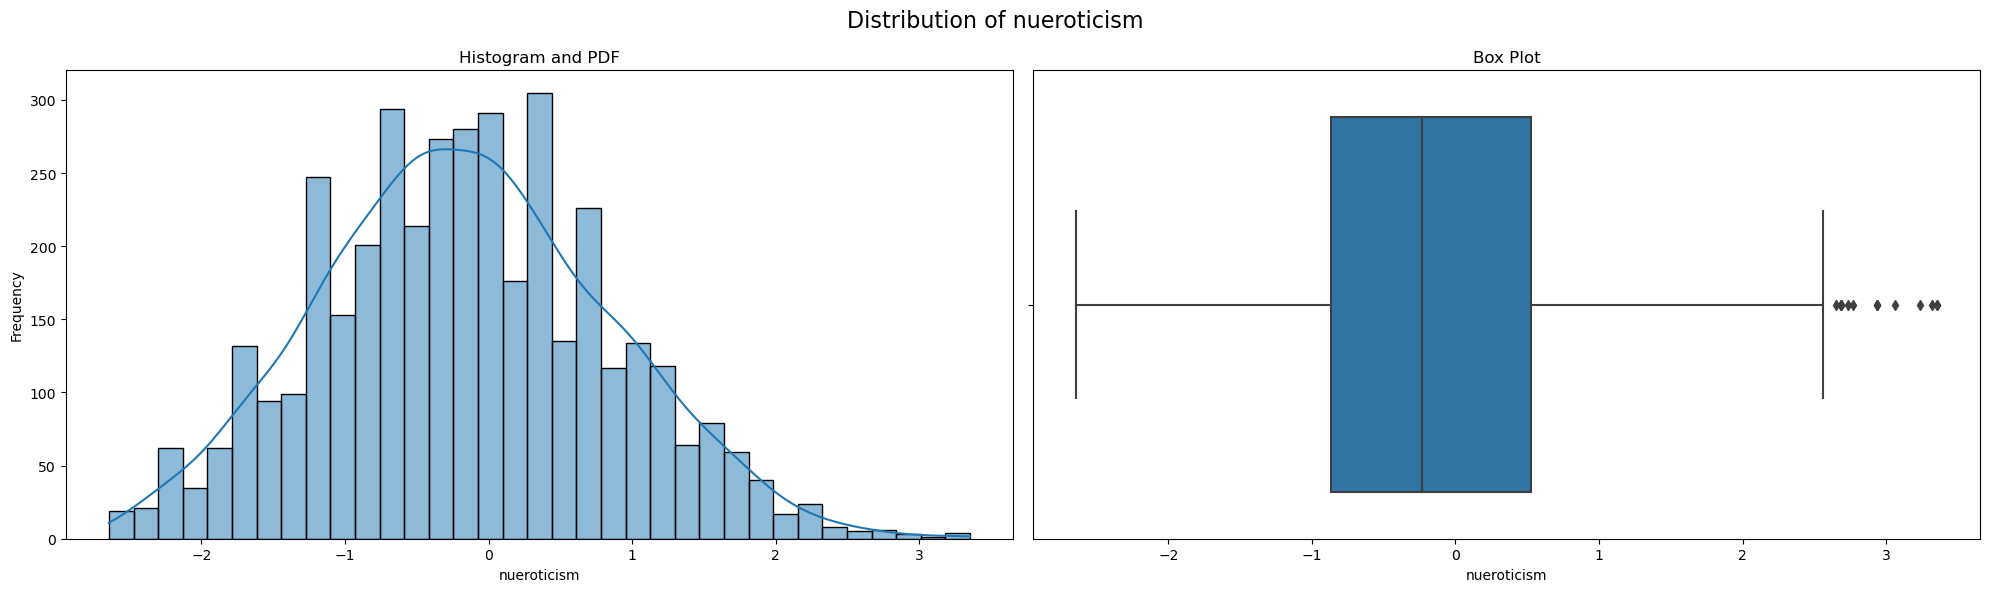

Observations for nueroticism:
- The distribution appears to be symmetric.
- The mean value is -0.17 and the median is -0.23.
- The data ranges from -2.64 to 3.35.
- Skewness: 0.17
- Kurtosis: -0.19
- The interquartile range (IQR) is 1.39
- There are 15 outliers identified.




Observations for openess_to_experience:
- The distribution appears to be skewed.
- The mean value is -0.14 and the median is -0.09.
- The data ranges from -7.38 to 1.82.
- Skewness: -1.51
- Kurtosis: 5.79
- The interquartile range (IQR) is 1.17
- There are 95 outliers identified.




In [11]:
print("\nUnivariate Analysis")

# Function to plot histograms and box plots side by side for numerical columns
def plot_hist_and_box(df, columns):
    for col in columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
        fig.suptitle(f'Distribution of {col}', fontsize=16)
        sns.histplot(df[col], kde=True, ax=ax1)
        ax1.set_title('Histogram and PDF')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Frequency')
        sns.boxplot(x=df[col], ax=ax2)
        ax2.set_title('Box Plot')
        ax2.set_xlabel(col)
        plt.tight_layout()
        plt.show()
        print(f"Observations for {col}:")
        print(f"- The distribution appears to be {'symmetric' if abs(df[col].skew()) < 0.5 else 'skewed'}.")
        print(f"- The mean value is {df[col].mean():.2f} and the median is {df[col].median():.2f}.")
        print(f"- The data ranges from {df[col].min():.2f} to {df[col].max():.2f}.")
        print(f"- Skewness: {df[col].skew():.2f}")
        print(f"- Kurtosis: {df[col].kurtosis():.2f}")
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"- The interquartile range (IQR) is {iqr:.2f}")
        print(f"- There are {len(outliers)} outliers identified.")
        print("\n")

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Plot histograms with PDF and box plots for numerical columns
plot_hist_and_box(data, numerical_columns)


Observations for DOJ count plot:
- The most frequent category is '2014-07-01 00:00:00' with 199 occurrences.
- The least frequent category is '2007-02-01 00:00:00' with 1 occurrences.
- There are 81 unique categories.




Observations for DOL count plot:
- The most frequent category is '2015-04-01 00:00:00' with 573 occurrences.
- The least frequent category is '2010-10-01 00:00:00' with 1 occurrences.
- There are 66 unique categories.




Observations for Designation count plot:
- The most frequent category is 'software engineer' with 539 occurrences.
- The least frequent category is 'jr. software developer' with 1 occurrences.
- There are 419 unique categories.




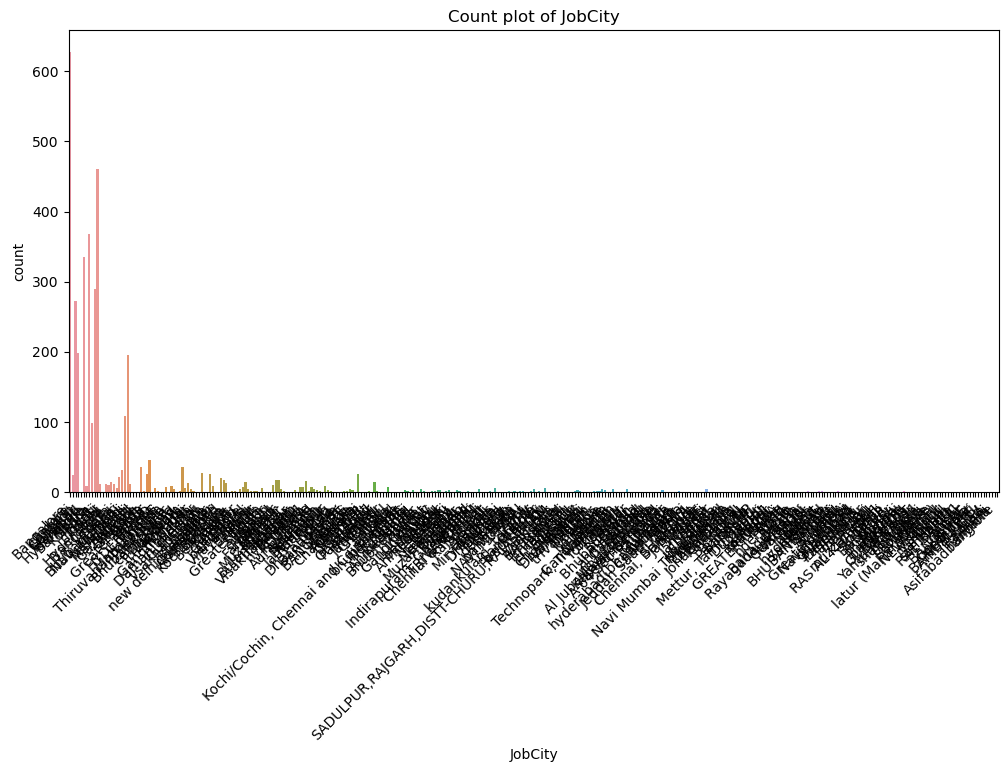

Observations for JobCity count plot:
- The most frequent category is 'Bangalore' with 627 occurrences.
- The least frequent category is 'Asifabadbanglore' with 1 occurrences.
- There are 339 unique categories.




Observations for Gender count plot:
- The most frequent category is 'm' with 3041 occurrences.
- The least frequent category is 'f' with 957 occurrences.
- There are 2 unique categories.




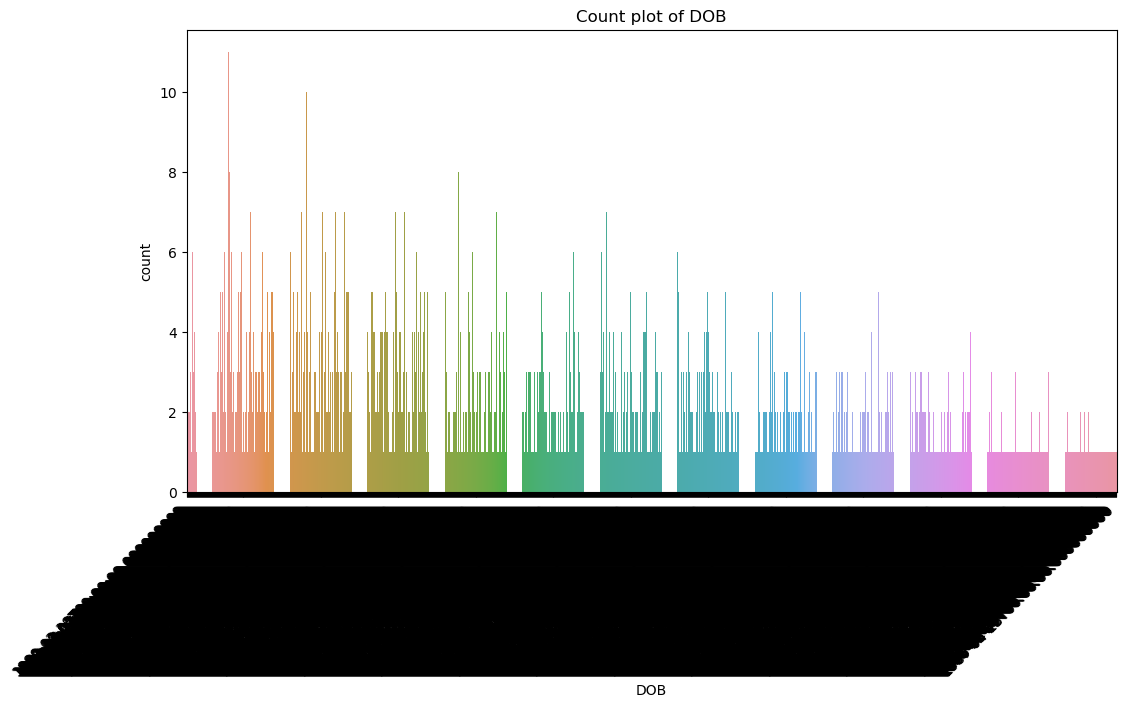

Observations for DOB count plot:
- The most frequent category is '1991-01-01 00:00:00' with 11 occurrences.
- The least frequent category is '1987-04-15 00:00:00' with 1 occurrences.
- There are 1872 unique categories.




Observations for 10board count plot:
- The most frequent category is 'cbse' with 1395 occurrences.
- The least frequent category is 'bse,odisha' with 1 occurrences.
- There are 275 unique categories.




Observations for 12board count plot:
- The most frequent category is 'cbse' with 1400 occurrences.
- The least frequent category is 'boardofintermediate' with 1 occurrences.
- There are 340 unique categories.




Observations for Degree count plot:
- The most frequent category is 'B.Tech/B.E.' with 3700 occurrences.
- The least frequent category is 'M.Sc. (Tech.)' with 2 occurrences.
- There are 4 unique categories.




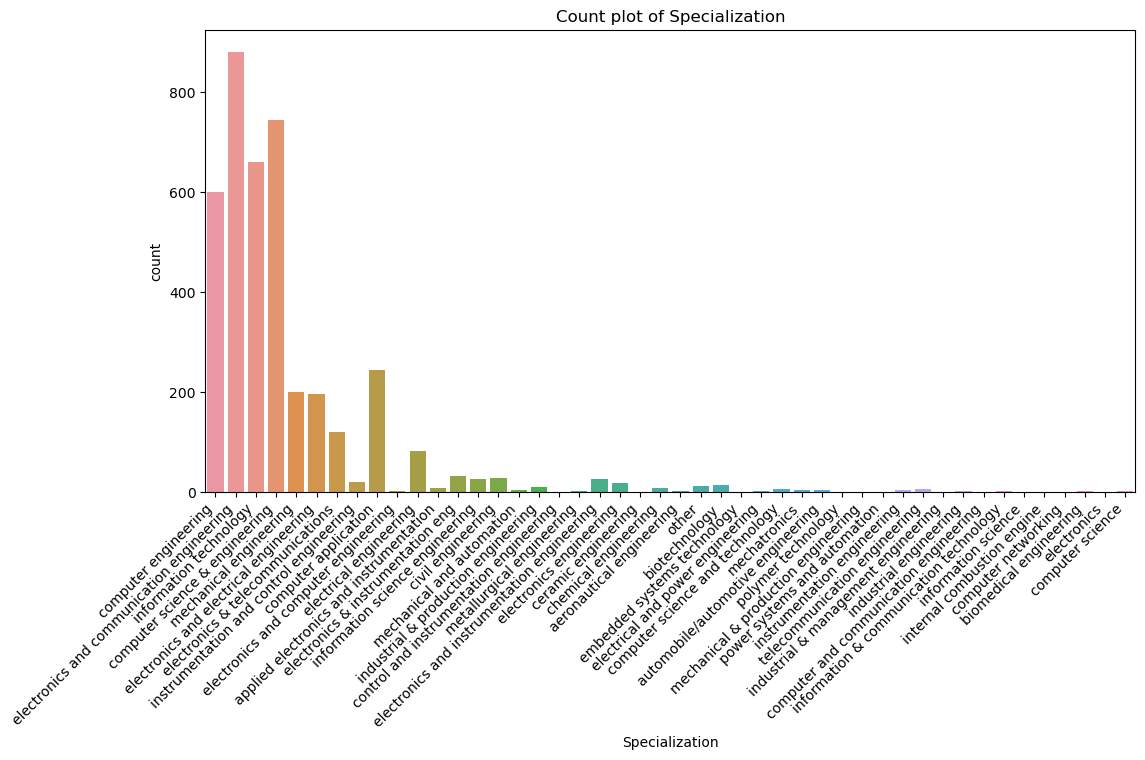

Observations for Specialization count plot:
- The most frequent category is 'electronics and communication engineering' with 880 occurrences.
- The least frequent category is 'industrial & management engineering' with 1 occurrences.
- There are 46 unique categories.




Observations for CollegeState count plot:
- The most frequent category is 'Uttar Pradesh' with 915 occurrences.
- The least frequent category is 'Goa' with 1 occurrences.
- There are 26 unique categories.




In [12]:
# Function to plot count plots for categorical columns
def plot_countplots(df, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Count plot of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        print(f"Observations for {col} count plot:")
        value_counts = df[col].value_counts()
        print(f"- The most frequent category is '{value_counts.index[0]}' with {value_counts.iloc[0]} occurrences.")
        print(f"- The least frequent category is '{value_counts.index[-1]}' with {value_counts.iloc[-1]} occurrences.")
        print(f"- There are {df[col].nunique()} unique categories.")
        print("\n")
        
# Separate numerical and categorical columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

# Plot count plots for categorical columns
plot_countplots(data, categorical_columns)


In [13]:
# Find outliers in numerical columns
for col in numerical_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"\nOutliers in {col}:")
    print(outliers[col])
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(data)) * 100:.2f}%")
    print("\n")


Outliers in ID:
Series([], Name: ID, dtype: int64)
Number of outliers: 0
Percentage of outliers: 0.00%



Outliers in Salary:
3       1100000
76       800000
92      1500000
123     1200000
128      675000
         ...   
3823     775000
3904     850000
3912     730000
3961     700000
3992     800000
Name: Salary, Length: 109, dtype: int64
Number of outliers: 109
Percentage of outliers: 2.73%



Outliers in 10percentage:
245     50.60
466     44.16
490     44.00
491     45.60
502     48.00
600     49.00
613     48.00
898     49.00
919     48.80
1064    49.00
1102    49.00
1169    48.50
1193    48.00
1235    50.60
1334    43.00
1838    50.00
1845    49.00
1955    45.33
1976    46.24
2037    48.00
2215    50.50
2292    50.00
2432    50.00
2655    50.66
2885    46.80
2982    50.00
3284    50.00
3425    50.00
3690    46.00
3743    49.90
Name: 10percentage, dtype: float64
Number of outliers: 30
Percentage of outliers: 0.75%



Outliers in 12graduation:
59      1995
193     2003
528     200

In [14]:
#Bivariate Analysis
print("\nBivariate Analysis")

# Function to plot scatter and hexbin plots for numerical-numerical relationships
def plot_scatter_and_hexbin(df, x_col, y_col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(f'Relationship between {x_col} and {y_col}', fontsize=16)
    
    # Scatter plot
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=ax1)
    ax1.set_title('Scatter Plot')
    
    # Hexbin plot
    hb = ax2.hexbin(df[x_col], df[y_col], gridsize=20, cmap='YlOrRd')
    ax2.set_title('Hexbin Plot')
    fig.colorbar(hb, ax=ax2, label='Count')
    
    plt.tight_layout()
    plt.show()
    
    correlation = df[x_col].corr(df[y_col])
    print(f"Observations for {x_col} vs {y_col}:")
    print(f"- The correlation coefficient is {correlation:.2f}")
    print(f"- There appears to be a {'positive' if correlation > 0 else 'negative'} {'strong' if abs(correlation) > 0.5 else 'weak'} relationship.")
    print("\n")



Bivariate Analysis


Numerical-Numerical Relationships:


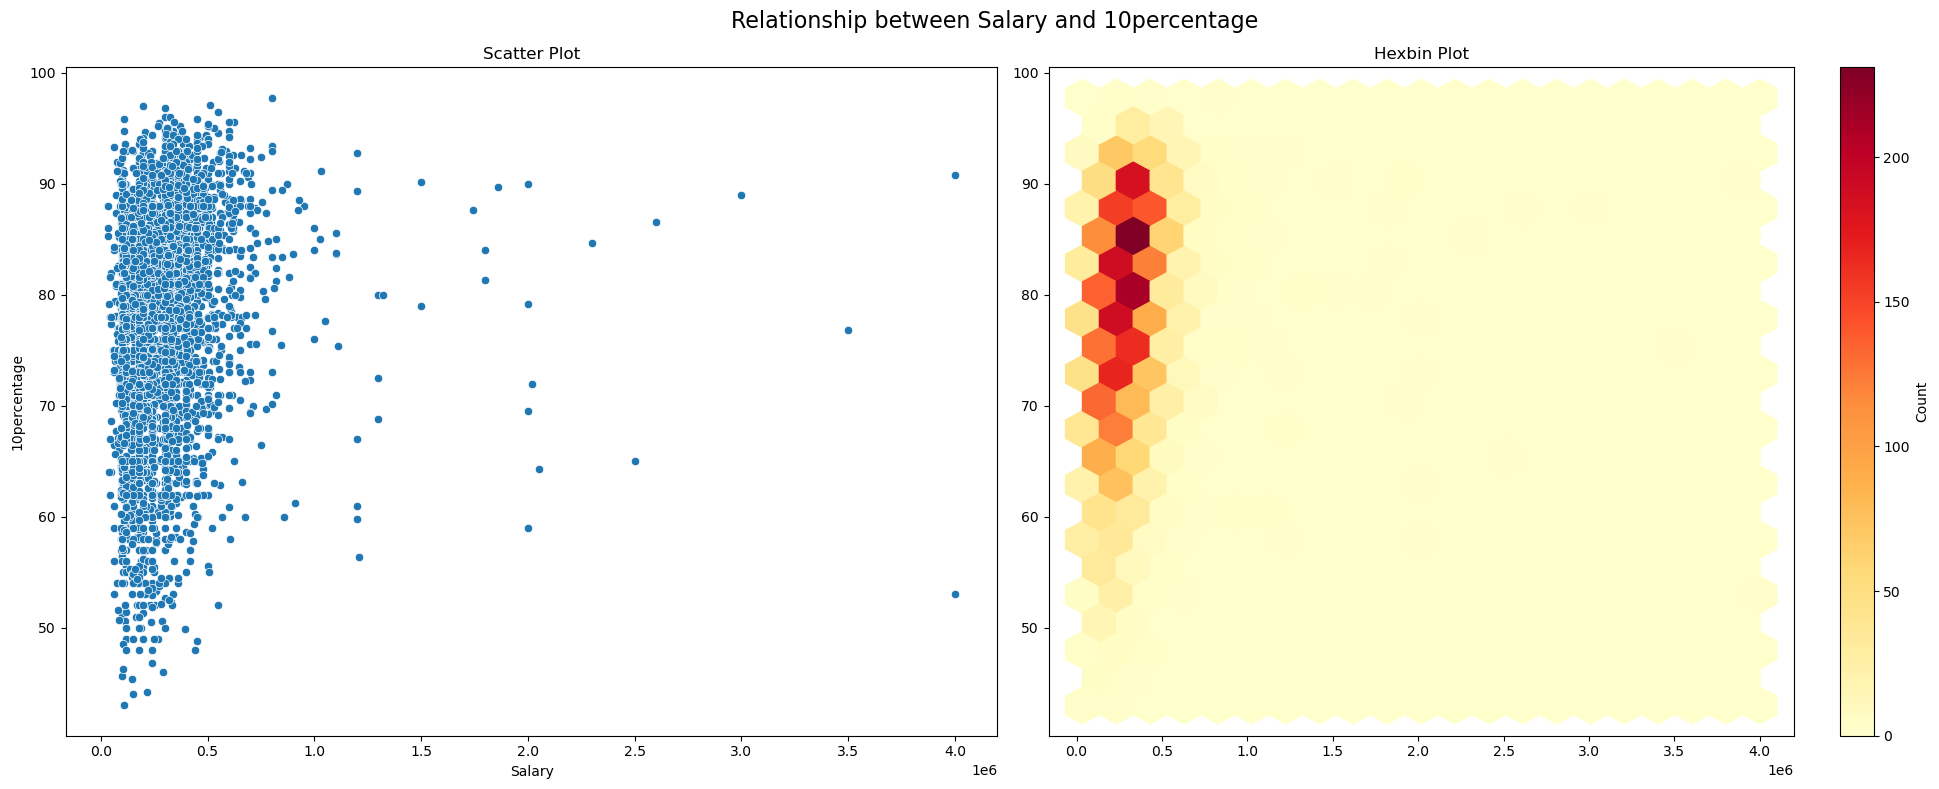

Observations for Salary vs 10percentage:
- The correlation coefficient is 0.18
- There appears to be a positive weak relationship.




In [15]:
print("Numerical-Numerical Relationships:")
plot_scatter_and_hexbin(data, 'Salary', '10percentage')

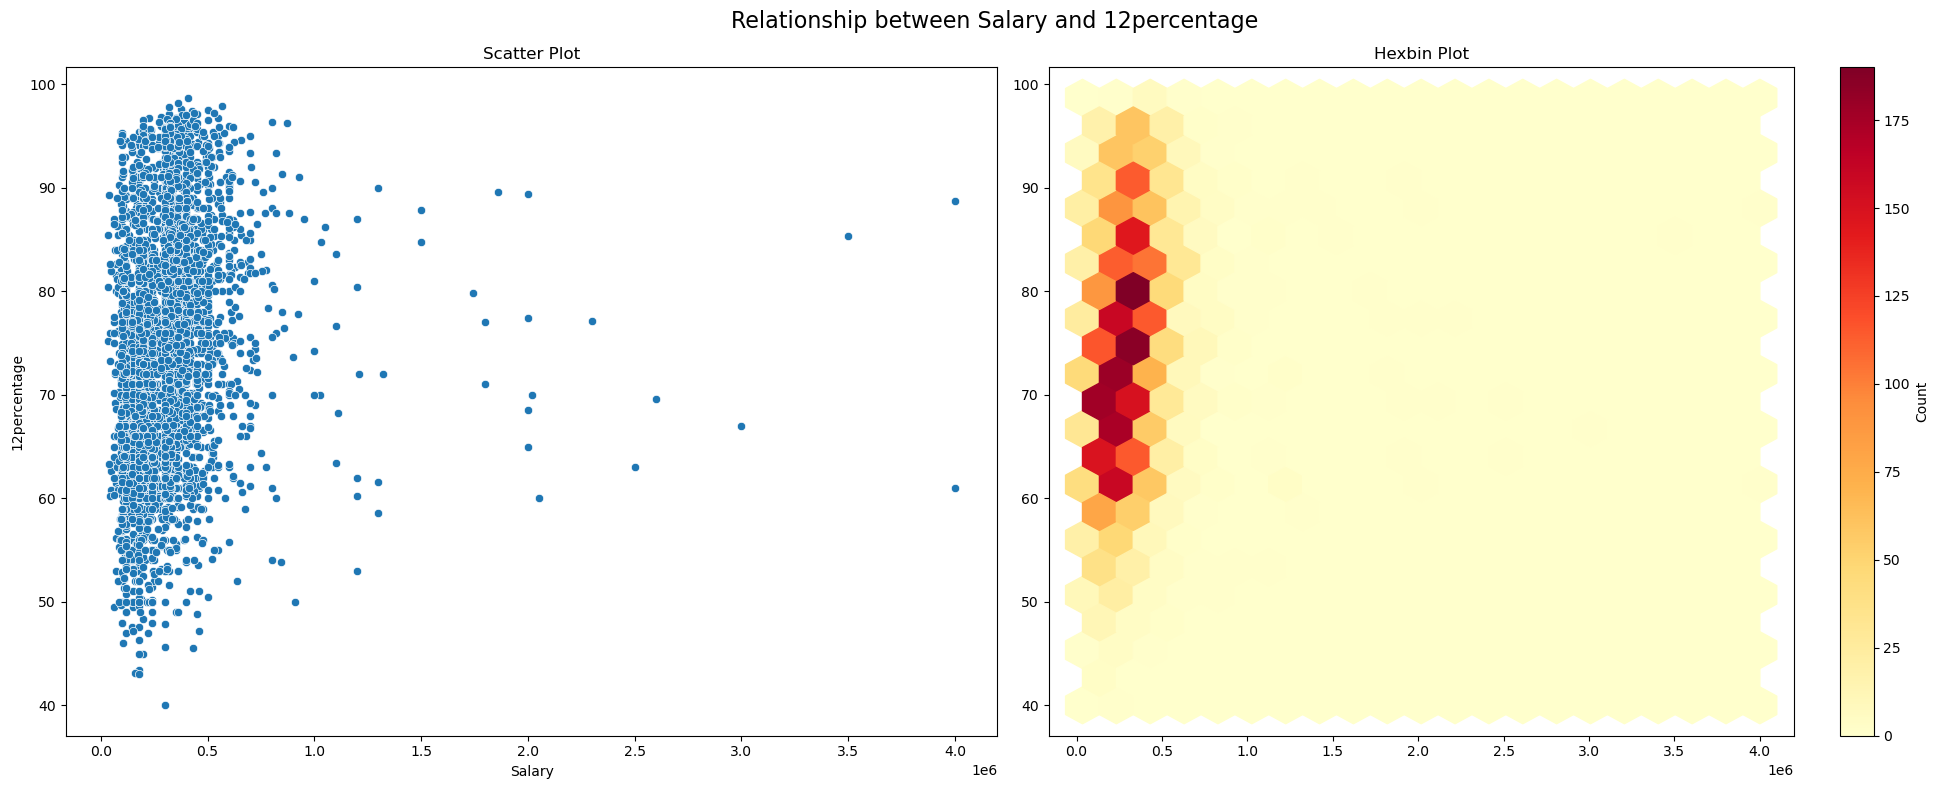

Observations for Salary vs 12percentage:
- The correlation coefficient is 0.17
- There appears to be a positive weak relationship.




In [16]:
plot_scatter_and_hexbin(data, 'Salary', '12percentage')

In [17]:
plot_scatter_and_hexbin(data, 'Salary', 'collegeGPA')

Observations for Salary vs collegeGPA:
- The correlation coefficient is 0.13
- There appears to be a positive weak relationship.




__Observation for Salary vs Education:__
- The above graphs shows a positively week realation between Salary and Education.

In [18]:
data['AMCAT Score'] = data['English']+data['Logical']+data['Quant']+data['Domain']+data['ComputerProgramming']+data['ElectronicsAndSemicon']+data['ComputerScience']+data['MechanicalEngg']+data['ElectricalEngg']+data['TelecomEngg']+data['CivilEngg']+data['conscientiousness']+data['agreeableness']+data['extraversion']+data['nueroticism']+data['openess_to_experience']
plot_scatter_and_hexbin(data, 'Salary', 'AMCAT Score')

Observations for Salary vs AMCAT Score:
- The correlation coefficient is 0.16
- There appears to be a positive weak relationship.




__Observation for Salary vs AMCAT Score:__
- The above graphs represent weak positive relation between Salary and AMCAT Score.

In [19]:
columns = ['ID', 'Salary', '10percentage', '12percentage', 'collegeGPA', 'AMCAT Score']
print('Pair Plot:')
# Pair plot for all columns
plt.figure(figsize=(20, 20))
sns.pairplot(data[columns])
plt.tight_layout()
plt.show()
print("Observations for the pair plot:")
print("- This plot shows the relationships between various columns")
print("- The diagonal shows the distribution of each variable.")
print("\n")

Pair Plot:


<Figure size 2000x2000 with 0 Axes>

Observations for the pair plot:
- This plot shows the relationships between various columns
- The diagonal shows the distribution of each variable.




In [20]:
def plot_cat_num_multi(df, cat_col, num_col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(f'Comparison of {cat_col} vs {num_col}', fontsize=16)

    # Box plot
    sns.boxplot(data=df, x=cat_col, y=num_col, ax=ax1)
    ax1.set_title('Box Plot')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # Violin plot
    sns.violinplot(data=df, x=cat_col, y=num_col, ax=ax2)
    ax2.set_title('Violin Plot')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    print(f"Observations for {cat_col} vs {num_col}:")
    print("- Box Plot: Shows median, quartiles, and potential outliers.")
    print("- Violin Plot: Displays the distribution shape for each category.")
    print("\n")

In [21]:
#for cat_col in ['Designation', 'JobCity', 'Gender', 'Specialization']:
plot_cat_num_multi(data, 'Gender', 'Salary')

Observations for Gender vs Salary:
- Box Plot: Shows median, quartiles, and potential outliers.
- Violin Plot: Displays the distribution shape for each category.




In [22]:
# Function to plot stacked bar plots for categorical-categorical relationships
def plot_stacked_bar(df, cat_col1, cat_col2):
    contingency_table = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
    contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Stacked Bar plot of {cat_col1} vs {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel('Proportion')
    plt.legend(title=cat_col2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    print(f"Observations for stacked bar plot of {cat_col1} vs {cat_col2}:")
    print(f"- Each bar represents the proportion of categories in {cat_col2} for each category in {cat_col1}.")
    print("- The full height of each bar is 100%.")
    print("\n")


Categorical-Categorical Relationships:


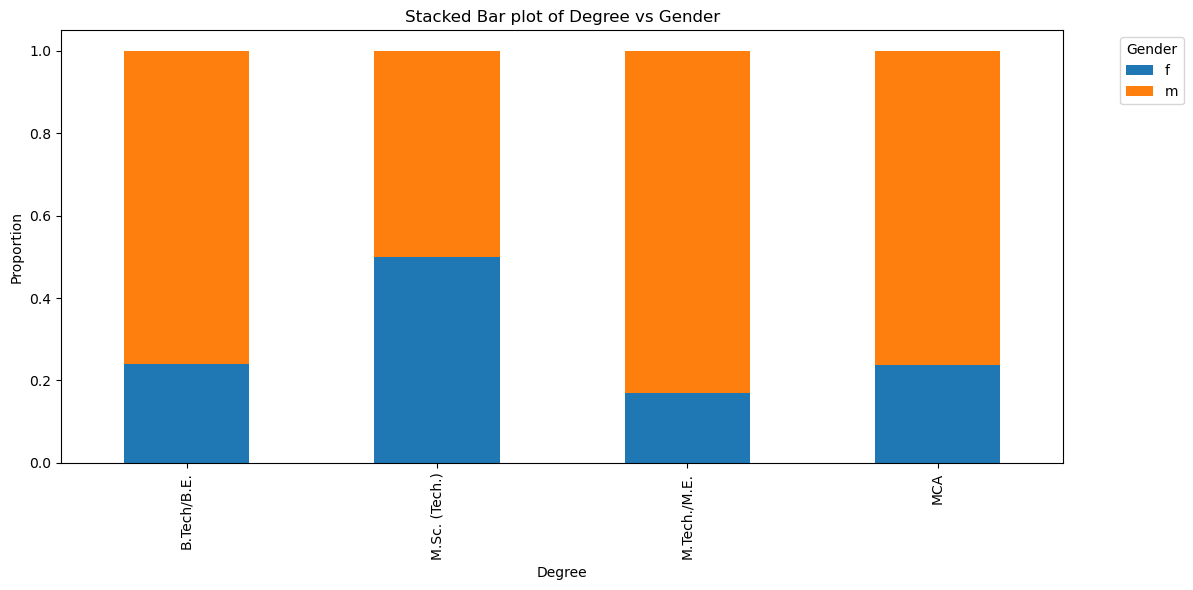

Observations for stacked bar plot of Degree vs Gender:
- Each bar represents the proportion of categories in Gender for each category in Degree.
- The full height of each bar is 100%.




In [23]:
# Categorical-Categorical Relationships
print("Categorical-Categorical Relationships:")
plot_stacked_bar(data, 'Degree', 'Gender')

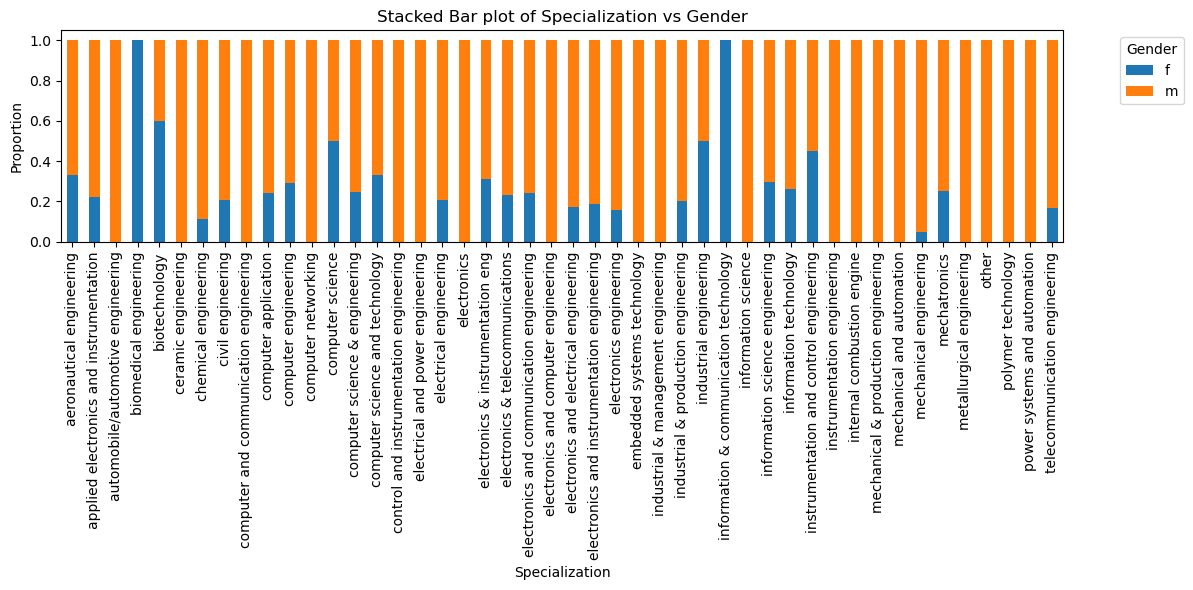

Observations for stacked bar plot of Specialization vs Gender:
- Each bar represents the proportion of categories in Gender for each category in Specialization.
- The full height of each bar is 100%.




In [24]:
plot_stacked_bar(data, 'Specialization', 'Gender')

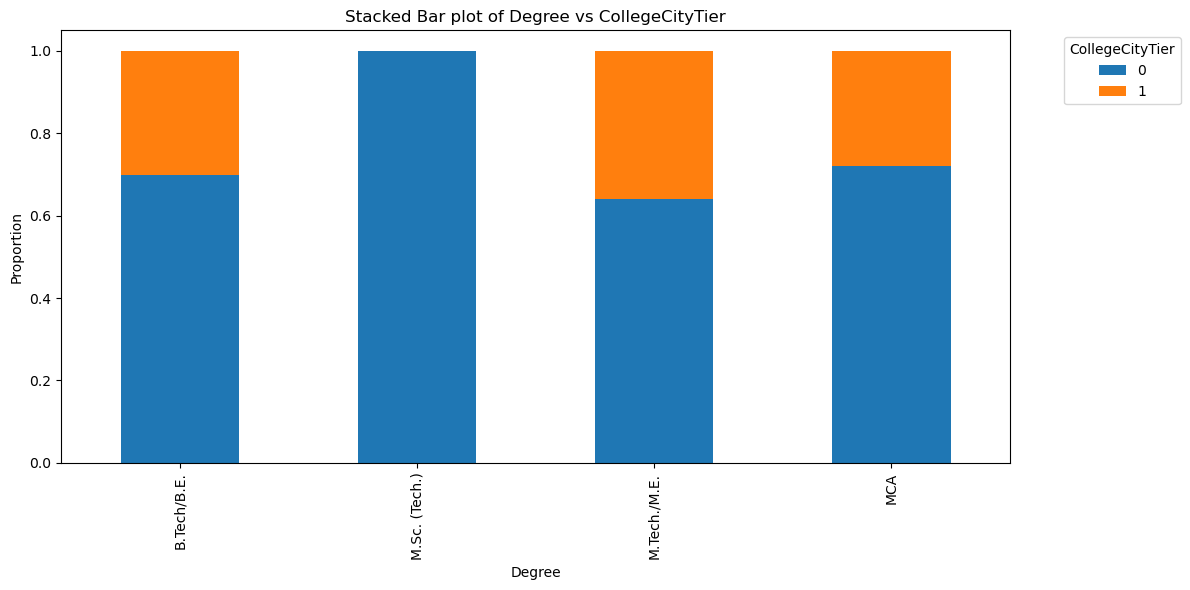

Observations for stacked bar plot of Degree vs CollegeCityTier:
- Each bar represents the proportion of categories in CollegeCityTier for each category in Degree.
- The full height of each bar is 100%.




In [25]:
plot_stacked_bar(data, 'Degree', 'CollegeCityTier')

In [26]:
plot_stacked_bar(data, 'Specialization', 'Degree')

Observations for stacked bar plot of Specialization vs Degree:
- Each bar represents the proportion of categories in Degree for each category in Specialization.
- The full height of each bar is 100%.




In [27]:
plot_stacked_bar(data, 'Specialization', 'CollegeCityTier')

Observations for stacked bar plot of Specialization vs CollegeCityTier:
- Each bar represents the proportion of categories in CollegeCityTier for each category in Specialization.
- The full height of each bar is 100%.




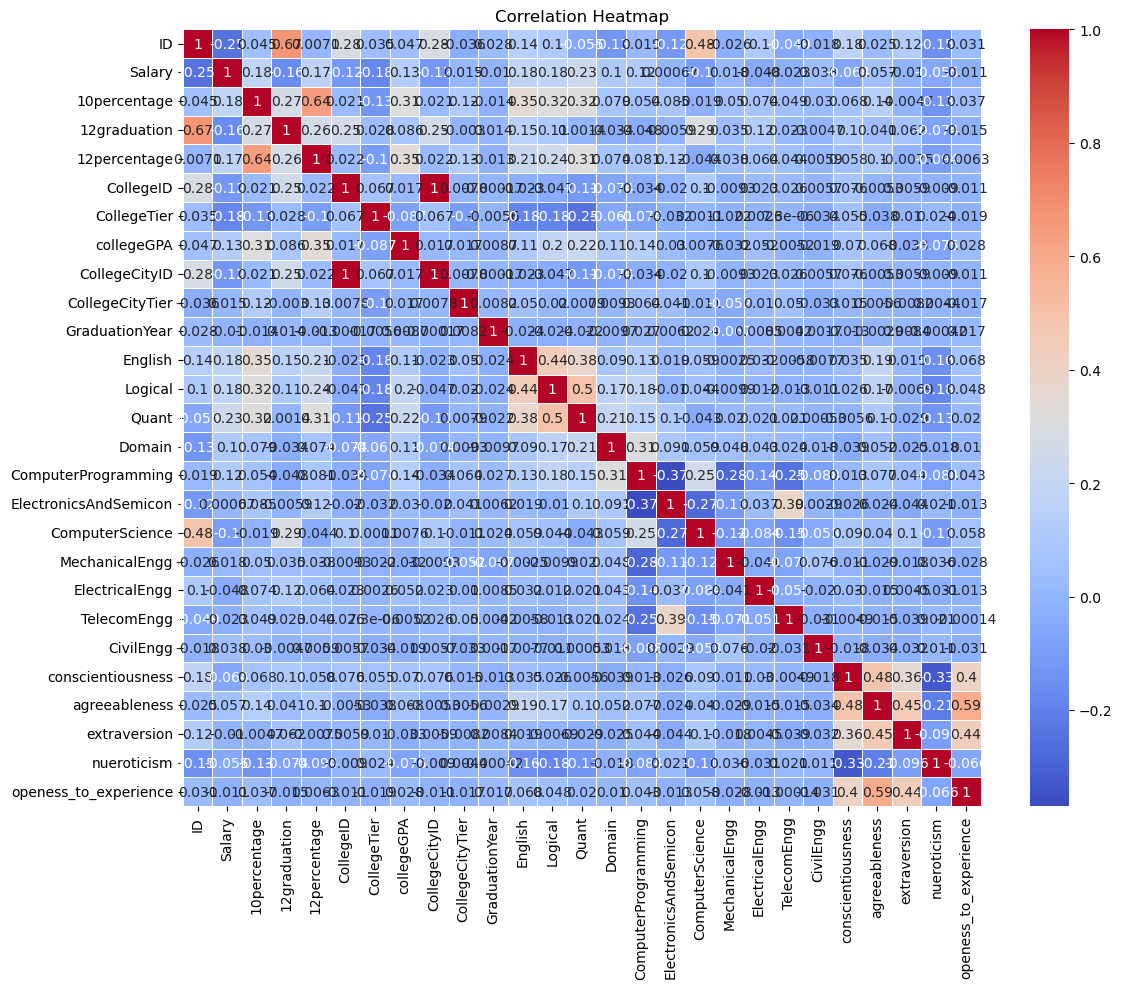

Observations for the correlation heatmap:
- The color intensity represents the strength of the correlation.
- Red colors indicate positive correlations, blue colors indicate negative correlations.
- The diagonal is always 1 as it represents the correlation of a variable with itself.




In [28]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
print("Observations for the correlation heatmap:")
print("- The color intensity represents the strength of the correlation.")
print("- Red colors indicate positive correlations, blue colors indicate negative correlations.")
print("- The diagonal is always 1 as it represents the correlation of a variable with itself.")
print("\n")

In [29]:
# Define the relevant job roles
relevant_roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']

# Filter rows where the Designation is one of the relevant roles
relevant_jobs = data[data['Designation'].isin(relevant_roles)]

# Further filter jobs where the Salary is between 2.5 lakhs and 3 lakhs
salary_range_jobs = relevant_jobs[(relevant_jobs['Salary'] >= 250000) & (relevant_jobs['Salary'] <= 300000)]

# Calculate the percentage of jobs in this salary range
percentage_in_range = (len(salary_range_jobs) / len(relevant_jobs)) * 100

# Percentage of Jobs with Salary between 2.5-3 lakhs
print(f"Percentage of jobs with a salary between 2.5-3 lakhs: {percentage_in_range:.2f}%")

Percentage of jobs with a salary between 2.5-3 lakhs: 14.47%


In [30]:
# Filter the data for Computer Science graduates and specified job roles
cs_jobs = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
cs_grads = data[(data['Specialization'] == 'computer science & engineering') & (data['Designation'].isin(cs_jobs))]

# Calculate average salary
avg_salary = cs_grads['Salary'].mean()
median_salary = cs_grads['Salary'].median()

print(f"Average salary for CS graduates in specified jobs: ₹{avg_salary:.2f}")
print(f"Median salary for CS graduates in specified jobs: ₹{median_salary:.2f}")

# Calculate the percentage of graduates earning within the claimed range
lower_bound = 250000  
upper_bound = 300000  
within_range = cs_grads[(cs_grads['Salary'] >= lower_bound) & (cs_grads['Salary'] <= upper_bound)]
percentage_within_range = (len(within_range) / len(cs_grads)) * 100

print(f"Percentage of graduates earning between ₹2.5-3 lakhs: {percentage_within_range:.2f}%")


Average salary for CS graduates in specified jobs: ₹332943.26
Median salary for CS graduates in specified jobs: ₹315000.00
Percentage of graduates earning between ₹2.5-3 lakhs: 17.02%


In [31]:
# Calculate and print statistics for each job role
for job in cs_jobs:
    job_data = cs_grads[cs_grads['Designation'] == job]
    print(f"\nStatistics for {job}:")
    print(f"Number of graduates: {len(job_data)}")
    print(f"Average salary: ₹{job_data['Salary'].mean():.2f}")
    print(f"Median salary: ₹{job_data['Salary'].median():.2f}")
    print(f"Minimum salary: ₹{job_data['Salary'].min():.2f}")
    print(f"Maximum salary: ₹{job_data['Salary'].max():.2f}")




Statistics for programming analyst:
Number of graduates: 0
Average salary: ₹nan
Median salary: ₹nan
Minimum salary: ₹nan
Maximum salary: ₹nan

Statistics for software engineer:
Number of graduates: 139
Average salary: ₹332949.64
Median salary: ₹315000.00
Minimum salary: ₹85000.00
Maximum salary: ₹1000000.00

Statistics for hardware engineer:
Number of graduates: 0
Average salary: ₹nan
Median salary: ₹nan
Minimum salary: ₹nan
Maximum salary: ₹nan

Statistics for associate engineer:
Number of graduates: 2
Average salary: ₹332500.00
Median salary: ₹332500.00
Minimum salary: ₹315000.00
Maximum salary: ₹350000.00


## Observation:
- Based on above analysis we can state that CSE Graduates who are in these specific roles are having average salary of 300000.
- Times of India states salary up to 2.5-3 lakhs and analysis states salary greater than 3 lakhs.
- Hence, The statement given by Times of India is False.
- But at the same time there are only few graduates in these specicific roles and most of them are in  software engineer.

In [32]:
# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Calculate Cramer's V for effect size
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V: {cramer_v}")



Chi-square test results:
Chi-square statistic: 104.46891913608455
p-value: 1.2453868176976918e-06
Degrees of freedom: 45
Cramer's V: 0.16164867748140374


## Observations:
- Based on above statistics we can conclude that the preference for specialization does not depend on gender.